# 1. Data Processing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1.1 Load User Reviews

In [ ]:
import pandas as pd

# df_reviews = pd.read_csv('/content/drive/MyDrive/Data Scientest - Project/05. Sentiment Analysis/Users Reviews/All User Reviews vs Genre/all_user_reviews_data_normalized_105000.csv')

df_reviews = pd.read_csv('all_user_reviews_data_normalized_105000.csv')

In [ ]:
display(df_reviews.head())
df_reviews.info()

game_title platform  global_user_score  user_score         username  \
0  mario kart wii      wii                8.6          10     ShadowStorm6   
1  mario kart wii      wii                8.6           9  CooperTrooper79   
2  mario kart wii      wii                8.6           0      rockodiador   
3  mario kart wii      wii                8.6          10      williamgt45   
4  mario kart wii      wii                8.6           7       WLS_Silver   

                                         review_text  
0  Le meilleur Mario kart. Il est bien plus bon q...  
1  Arguably the best game in the series. Very com...  
2  Mario Kart Wii? Seriously? What a disaster! Th...  
3  This game is one of my all time favorites and ...  
4  So much fun to play. Played this as a kid and ...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105423 entries, 0 to 105422
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   game_title         105423 non-null  object 
 1   platform           105423 non-null  object 
 2   global_user_score  105423 non-null  float64
 3   user_score         105423 non-null  int64  
 4   username           105423 non-null  object 
 5   review_text        105350 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ MB


## 1.2 Review Text Translation

> *Create a column for counting english and non english reviews*

In [ ]:
from langdetect import detect

# Function to recognise and mark non-English reviews
def check_english(text):
    try:
        # Check the language for each entry in the column
        detected_lang = detect(text)
        # If the detected language is not English, mark it
        if detected_lang != 'en':
            check_text = 0 #'no'
        else:
            check_text = 1 #'yes'

        return check_text

    except Exception as e:
        print(f"Error translating text: {e}")
        check_text = 0
        return check_text  # Return the original text if translation fails


In [ ]:
# Mark all reviews: 1 - English, 0 - non English
df_reviews['original_english'] = df_reviews.review_text.apply(check_english)

Error translating text: expected string or bytes-like object, got 'float'
Error translating text: expected string or bytes-like object, got 'float'
Error translating text: expected string or bytes-like object, got 'float'
Error translating text: No features in text.
Error translating text: No features in text.
Error translating text: No features in text.
Error translating text: No features in text.
Error translating text: No features in text.
Error translating text: No features in text.
Error translating text: No features in text.
Error translating text: No features in text.
Error translating text: No features in text.
Error translating text: No features in text.
Error translating text: No features in text.
Error translating text: No features in text.
Error translating text: expected string or bytes-like object, got 'float'
Error translating text: No features in text.
Error translating text: No features in text.
Error translating text: expected string or bytes-like object, got 'float'


In [ ]:
print(df_reviews.shape)
print(df_reviews.original_english.value_counts())
print(round((1 - df_reviews.original_english.sum() / df_reviews.shape[0]) * 100, 2), '% of all reviews are not in English.')

(105423, 7)
original_english
1    90613
0    14810
Name: count, dtype: int64
14.05 % of all reviews are not in English.


In [ ]:
pip install deep-translator

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install langdetect

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from deep_translator import GoogleTranslator
from langdetect import detect

# Function to translate non-English reviews to English
def translate_to_english(text):
    try:
        # Check the language for each entry in the column
        detected_lang = detect(text)
        # If the detected language is not English, translate it
        if detected_lang != 'en':
            translated_text = GoogleTranslator(source = 'auto', target = 'en').translate(text)
        else:
            translated_text = text  # If already English, leave it as it is

        return translated_text

    except Exception as e:
        print(f"Error translating text: {e}\n {text}")
        return text  # Return the original text if translation fails


# Translate all reviews
df_reviews['review_translated'] = df_reviews.review_text.apply(translate_to_english)


Error translating text: expected string or bytes-like object, got 'float'
 nan
Error translating text: expected string or bytes-like object, got 'float'
 nan
Error translating text: expected string or bytes-like object, got 'float'
 nan
Error translating text: No features in text.
 ⁣⁣⁣⁣⁣⁣⁣⁣⁣⁣⁣⁣⁣⁣⁣⁣⁣⁣⁣⁣⁣⁣⁣⁣⁣⁣⁣⁣⁣⁣⁣⁣⁣⁣⁣⁣⁣⁣⁣⁣⁣⁣⁣⁣⁣⁣⁣⁣⁣⁣⁣⁣⁣⁣⁣⁣⁣⁣⁣⁣⁣⁣⁣⁣⁣⁣⁣⁣⁣⁣⁣⁣⁣⁣⁣⁣⁣⁣⁣⁣⁣⁣⁣⁣9.3⁣⁣⁣⁣⁣⁣⁣⁣⁣⁣⁣⁣⁣⁣⁣⁣⁣⁣⁣⁣⁣⁣⁣⁣⁣⁣⁣⁣⁣⁣⁣/10
Error translating text: No features in text.
 9/10
Error translating text: No features in text.
 ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
Error translating text: No features in text.
 93/100 .
Error translating text: No features in text.
 ㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤㅤ
Error translating text: No features in text.
 7/10
Error translating text: No features in text.
 ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀

In [ ]:
df_reviews.head()

game_title platform  global_user_score  user_score         username  \
0  mario kart wii      wii                8.6          10     ShadowStorm6   
1  mario kart wii      wii                8.6           9  CooperTrooper79   
2  mario kart wii      wii                8.6           0      rockodiador   
3  mario kart wii      wii                8.6          10      williamgt45   
4  mario kart wii      wii                8.6           7       WLS_Silver   

                                         review_text  original_english  \
0  Le meilleur Mario kart. Il est bien plus bon q...                 0   
1  Arguably the best game in the series. Very com...                 1   
2  Mario Kart Wii? Seriously? What a disaster! Th...                 1   
3  This game is one of my all time favorites and ...                 1   
4  So much fun to play. Played this as a kid and ...                 1   

                                   review_translated  
0  The best Mario kart. It's much better than tha...  
1  Arguably the best game in the series. Very com...  
2  Mario Kart Wii? Seriously? What a disaster! Th...  
3  This game is one of my all time favorites and ...  
4  So much fun to play. Played this as a kid and ...

In [ ]:
# Mark all reviews: 1 - English, 0 - non English
df_reviews['translated_english'] = df_reviews.review_translated.apply(check_english)

Error translating text: expected string or bytes-like object, got 'float'
Error translating text: expected string or bytes-like object, got 'float'
Error translating text: expected string or bytes-like object, got 'float'
Error translating text: No features in text.
Error translating text: No features in text.
Error translating text: No features in text.
Error translating text: No features in text.
Error translating text: No features in text.
Error translating text: No features in text.
Error translating text: No features in text.
Error translating text: No features in text.
Error translating text: No features in text.
Error translating text: No features in text.
Error translating text: No features in text.
Error translating text: No features in text.
Error translating text: expected string or bytes-like object, got 'float'
Error translating text: No features in text.
Error translating text: No features in text.
Error translating text: expected string or bytes-like object, got 'float'


In [ ]:
print(df_reviews.shape[0])
print(df_reviews.original_english.value_counts())
print(round((1 - df_reviews.original_english.sum() / df_reviews.shape[0]) * 100, 2), '% of all reviews are originally not in English.')
print(df_reviews.translated_english.value_counts())
print(round((1 - df_reviews.translated_english.sum() / df_reviews.shape[0]) * 100, 2), '% of all reviews remain not in English.')

105423
original_english
1    90613
0    14810
Name: count, dtype: int64
14.05 % of all reviews are originally not in English.
translated_english
1    103569
0      1854
Name: count, dtype: int64
1.76 % of all reviews remain not in English.


In [ ]:
df_reviews['english_total'] =  df_reviews.original_english + df_reviews.translated_english

In [ ]:
df_reviews.english_total.value_counts()

english_total
2    90613
1    12956
0     1854
Name: count, dtype: int64

In [ ]:
df_reviews.isna().sum()

game_title             0
platform               0
global_user_score      0
user_score             0
username               0
review_text           73
original_english       0
review_translated     73
translated_english     0
english_total          0
dtype: int64

In [ ]:
df_reviews = df_reviews.dropna(how = 'any', axis = 0)

In [ ]:
df_reviews.english_total.value_counts()

english_total
2    90613
1    12956
0     1781
Name: count, dtype: int64

In [ ]:
# Save the dataframe with translated reviews and english checks for streamlit to a csv file
df_reviews.to_csv('all_user_reviews_translated_streamlit.csv', index = False)

In [ ]:
# Load the dataframe with translated reviews and english checks for streamlit from the csv file
df_reviews = pd.read_csv('all_user_reviews_translated_streamlit.csv')

## 1.4 Review Text Preprocessing

In [ ]:
import re
from nltk.corpus import stopwords
from string import punctuation
from nltk.stem import WordNetLemmatizer

# Initialize a lemmatizer and Stopwords
wordnet_lemmatizer = WordNetLemmatizer()

custom_stopwords = {"game", "games", 'one', 'play', 'even', 'make', 'really', 'still', 'good', 'great', 'bad', 'worst', 'fun', 'much', 'thing', 'though'\
                    'much', 'little', 'first', 'well', 'title', 'best', 'better', 'every', 'nice', 'amazing', 'time', 'played', 'pretty', 'feel', 'story', \
                    'character', 'gameplay'}
stop_words = set(stopwords.words('english')).union(set(punctuation), custom_stopwords)

In [ ]:
# Preprocess text reviews
def preprocess_text(text):
    text = re.sub(r'\W', ' ', text)  # Substitute everything except of a-z, A-Z, 0-9 and _ with a space
    text = re.sub(r'\s+', ' ', text) # Substitute multiple scpaces with a single space
    text = re.sub(r'\d', ' ', text)  # Substitute all numbers with a space
    text = text.lower()
    text = wordnet_lemmatizer.lemmatize(text)
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

In [ ]:
df_reviews['review_preprocessed'] = df_reviews.review_text.apply(preprocess_text).astype(str)

### Merging User Reviews with Game Data

In [ ]:
df_games = pd.read_csv('complete_records_3280_streamlit.csv')

df_games = df_games.rename(str.lower, axis = 1)

In [ ]:
# Merge review DataFrame with games info DataFrame
df_games_reviews = df_reviews.merge(right = df_games, on = 'game_title', how = 'left')

df_games_reviews = df_games_reviews.dropna(how = 'any', axis = 0)

In [ ]:
df_games_reviews.isna().sum()

game_title                 0
platform                   0
global_user_score          0
user_score                 0
username                   0
review_text                0
original_english           0
review_translated          0
translated_english         0
english_total              0
review_preprocessed        0
user_review_count          0
critic_review_count        0
avg_rank                   0
year                       0
genre                      0
publisher                  0
jp_sales                   0
total_sales                0
metascore                  0
difficulty_easy            0
difficulty_just_right      0
difficulty_simple          0
difficulty_tough           0
difficulty_unforgiving     0
play time_<_1_hour         0
play time_>=_80_hours      0
play time_~1_hour          0
play time_~12_hours        0
play time_~2_hours         0
play time_~20_hours        0
play time_~4_hours         0
play time_~40_hours        0
play time_~60_hours        0
play time_~8_h

In [ ]:
# Save the merged dataframe with translated reviews and games data for streamlit to a csv file
df_games_reviews.to_csv('all_user_reviews_translated_preprocessed_with_games_data_streamlit.csv', index = False)

In [ ]:
# Load the merged dataframe with translated reviews and games data for streamlit from a csv file
df_games_reviews = pd.read_csv('all_user_reviews_translated_preprocessed_with_games_data_streamlit.csv')

### Word Clouds

In [ ]:
pip install wordcloud

  Using cached wordcloud-1.9.4-cp312-cp312-win_amd64.whl.metadata (3.5 kB)
Using cached wordcloud-1.9.4-cp312-cp312-win_amd64.whl (301 kB)
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
# Function to generate and save word clouds
def generate_word_clouds(df, text_column, output_folder):
    genres = df['genre'].unique()

    for genre in genres:
        # Filter reviews for the genre
        genre_reviews = " ".join(df[df['genre'] == genre][text_column].dropna().astype(str))

        # Generate word cloud
        wordcloud = WordCloud(width = 800, height = 400, background_color = 'white').generate(genre_reviews)

        # Plot and save the word cloud
        plt.figure(figsize = (10, 5))
        plt.imshow(wordcloud, interpolation = 'bilinear')
        plt.axis('off')
        plt.title(f"{genre} ({text_column})", fontsize = 16)
        plt.tight_layout()
        plt.savefig(f"{output_folder}/{genre}_{text_column}.png")  # Save word cloud as PNG
        plt.close()

# Create word clouds for raw and preprocessed reviews
output_folder = "Word Clouds"  # Define the output folder for word clouds
import os
os.makedirs(output_folder, exist_ok = True)

print("Generating word clouds for raw reviews...")
generate_word_clouds(df_games_reviews, 'review_text', output_folder)

print("Generating word clouds for preprocessed reviews...")
generate_word_clouds(df_games_reviews, 'review_preprocessed', output_folder)

print(f"Word clouds saved in the folder: {output_folder}")

Generating word clouds for raw reviews...
Generating word clouds for preprocessed reviews...
Word clouds saved in the folder: Word Clouds


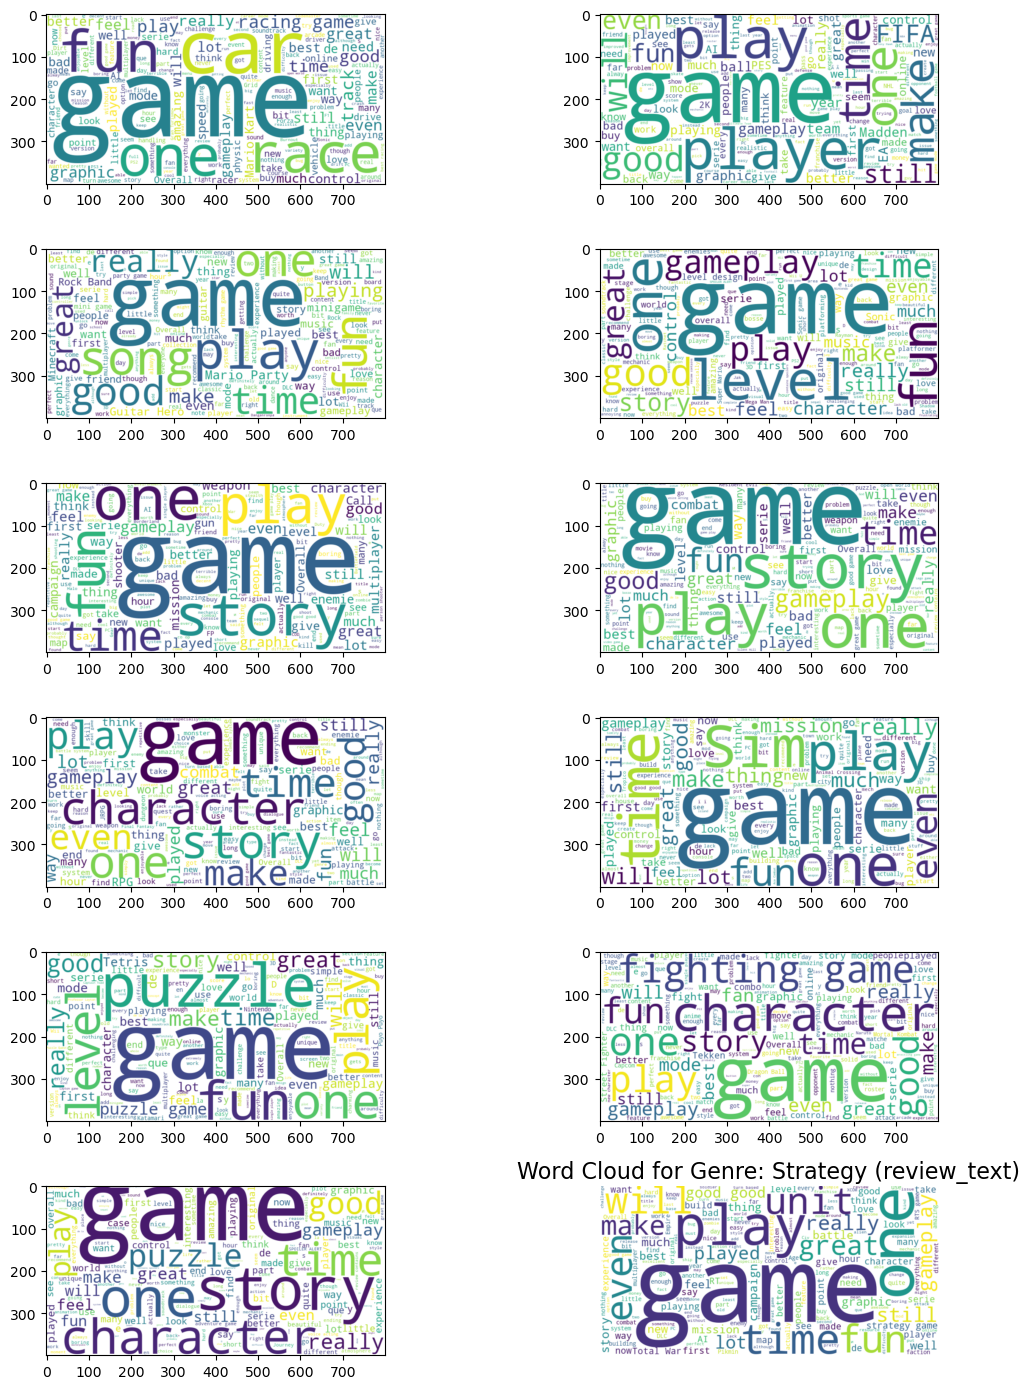

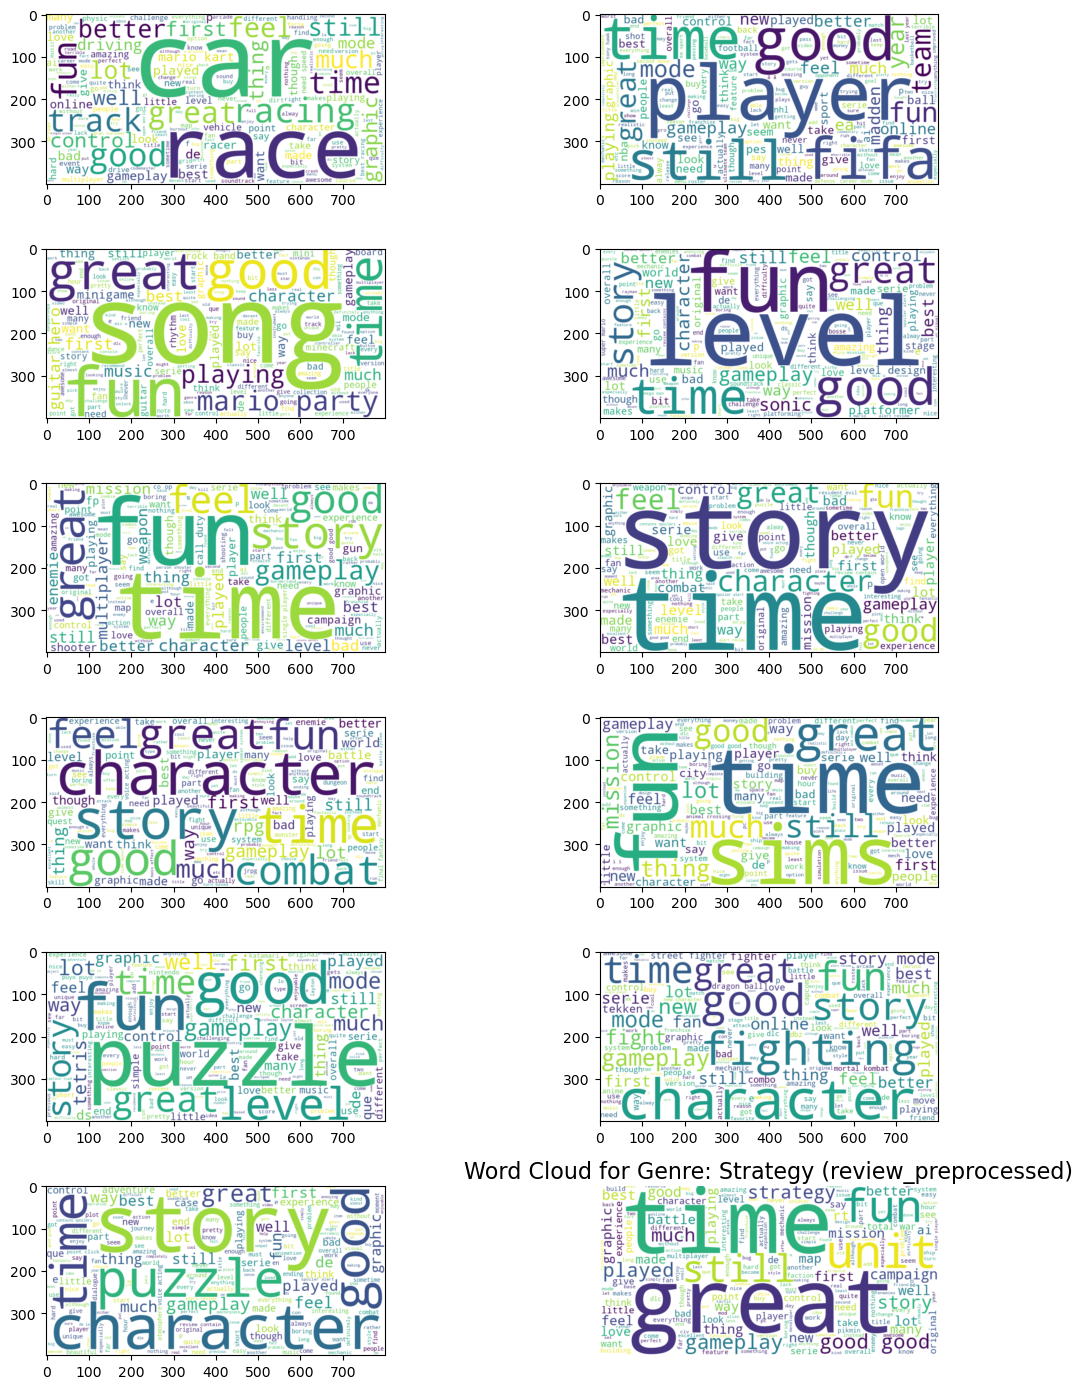

In [ ]:
# Function to generate and save word clouds
genres = df_games_reviews.genre.unique()
reviews = ['review_text', 'review_preprocessed']

for review in reviews:
    fig, axes = plt.subplots(6, 2, figsize = (12, 14))

    for genre, ax in zip(genres, axes.ravel()):
    for genre_review, ax in zip(genre_reviews, axes.ravel()):
        genre_review = (" ".join(df_games_reviews[df_games_reviews['genre'] == genre][review].dropna().astype(str)))

        # Generate word cloud
        wordcloud = WordCloud(width = 800, height = 400, background_color = 'white').generate(genre_review)

        # Plot and save the word cloud
        # plt.figure(figsize = (6, 4))
        ax.imshow(wordcloud, interpolation = 'bilinear')
        plt.axis('off')
        plt.title(f"Word Cloud for Genre: {genre} ({review})", fontsize = 16)

    fig.tight_layout()
        # plt.savefig(f"{output_folder}/{genre}_{text_column}.png")  # Save word cloud as PNG
        # plt.close()
    plt.show()

# # Create word clouds for raw and preprocessed reviews
# output_folder = "Word Clouds"  # Define the output folder for word clouds
# import os
# os.makedirs(output_folder, exist_ok = True)

# display(generate_word_clouds(df_games_reviews, 'review_text', 'Action'))

# display(generate_word_clouds(df_games_reviews, 'review_preprocessed', 'Action'))


### Grouping Game Metrics Columns

In [ ]:
# Load the merged dataframe with translated reviews and games data for streamlit from a csv file
import pandas as pd

df_games_reviews = pd.read_csv('all_user_reviews_translated_preprocessed_with_games_data_streamlit.csv')

In [ ]:
df_games_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103404 entries, 0 to 103403
Data columns (total 43 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   game_title               103404 non-null  object 
 1   platform                 103404 non-null  object 
 2   global_user_score        103404 non-null  float64
 3   user_score               103404 non-null  int64  
 4   username                 103404 non-null  object 
 5   review_text              103404 non-null  object 
 6   original_english         103404 non-null  int64  
 7   review_translated        103404 non-null  object 
 8   translated_english       103404 non-null  int64  
 9   english_total            103404 non-null  int64  
 10  review_preprocessed      102772 non-null  object 
 11  user_review_count        103404 non-null  float64
 12  critic_review_count      103404 non-null  float64
 13  avg_rank                 103404 non-null  float64
 14  rele

In [ ]:
cols_drop = []

for col in df_games.columns:
    if col[:5] == 'Play ' or col[:5] == 'Compl' or col[:5] == 'Diffi':
        cols_drop.append(col)

print(cols_drop)

['Difficulty_Easy', 'Difficulty_Just_Right', 'Difficulty_Simple', 'Difficulty_Tough', 'Difficulty_Unforgiving', 'Play Time_<_1_Hour', 'Play Time_>=_80_Hours', 'Play Time_~1_Hour', 'Play Time_~12_Hours', 'Play Time_~2_Hours', 'Play Time_~20_Hours', 'Play Time_~4_Hours', 'Play Time_~40_Hours', 'Play Time_~60_Hours', 'Play Time_~8_Hours', 'Completion_Beat_It', 'Completion_Conquered_It', 'Completion_Halfway', 'Completion_Played_It', 'Completion_Tried_It']


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df_game_metrics = df_games_reviews[['game_title', 'play_time', 'game_difficulty', 'game_completion'] + cols_play_time + cols_difficulty + cols_completion]

In [ ]:
total_averages = df_game_metrics.groupby("game_title").mean().mean()

total_averages

play_time                  30.956183
game_difficulty             2.987730
game_completion             3.220169
play time_<_1_hour          1.101959
play time_~1_hour           1.150934
play time_~2_hours          1.988081
play time_~4_hours          5.310868
play time_~8_hours         10.776435
play time_~12_hours        17.234915
play time_~20_hours        22.859578
play time_~40_hours        17.489039
play time_~60_hours         7.406641
play time_>=_80_hours      14.681433
difficulty_easy            13.605876
difficulty_simple           3.802118
difficulty_just_right      57.213070
difficulty_tough           20.971217
difficulty_unforgiving      4.407772
completion_tried_it        15.185803
completion_played_it       21.691244
completion_halfway          9.130652
completion_beat_it         33.904403
completion_conquered_it    20.087798
dtype: float64

In [ ]:
avarages_grouped = df_game_metrics.groupby("game_title").mean().sort_values(by = 'game_title')

display(avarages_grouped[cols_play_time + ['play_time']].head())
display(avarages_grouped.info())

play time_<_1_hour  play time_~1_hour  \
game_title                                                                
007: quantum of solace                          0.00               0.00   
100 classic books                               7.41               0.00   
101-in-1 explosive megamix                      0.00               0.00   
1701 a.d.                                       0.00               0.00   
18 wheeler: american pro trucker                9.62               7.69   

                                  play time_~2_hours  play time_~4_hours  \
game_title                                                                 
007: quantum of solace                          1.08                5.38   
100 classic books                               3.70                0.00   
101-in-1 explosive megamix                      9.09               27.27   
1701 a.d.                                       0.00                0.00   
18 wheeler: american pro trucker               13.46               11.54   

                                  play time_~8_hours  play time_~12_hours  \
game_title                                                                  
007: quantum of solace                         33.33                29.03   
100 classic books                               0.00                 3.70   
101-in-1 explosive megamix                     27.27                18.18   
1701 a.d.                                       6.67                 6.67   
18 wheeler: american pro trucker               23.08                11.54   

                                  play time_~20_hours  play time_~40_hours  \
game_title                                                                   
007: quantum of solace                          18.28                 7.53   
100 classic books                                7.41                 0.00   
101-in-1 explosive megamix                      18.18                 0.00   
1701 a.d.                                       13.33                20.00   
18 wheeler: american pro trucker                15.38                 3.85   

                                  play time_~60_hours  play time_>=_80_hours  \
game_title                                                                     
007: quantum of solace                           2.15                   3.23   
100 classic books                                3.70                  74.07   
101-in-1 explosive megamix                       0.00                   0.00   
1701 a.d.                                       20.00                  33.33   
18 wheeler: american pro trucker                 0.00                   3.85   

                                  play_time  
game_title                                   
007: quantum of solace             16.92880  
100 classic books                  63.51305  
101-in-1 explosive megamix          9.27180  
1701 a.d.                          50.66400  
18 wheeler: american pro trucker   11.78300

<class 'pandas.core.frame.DataFrame'>
Index: 3007 entries, 007: quantum of solace to zubo
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   play_time                3007 non-null   float64
 1   game_difficulty          3007 non-null   float64
 2   game_completion          3007 non-null   float64
 3   play time_<_1_hour       3007 non-null   float64
 4   play time_~1_hour        3007 non-null   float64
 5   play time_~2_hours       3007 non-null   float64
 6   play time_~4_hours       3007 non-null   float64
 7   play time_~8_hours       3007 non-null   float64
 8   play time_~12_hours      3007 non-null   float64
 9   play time_~20_hours      3007 non-null   float64
 10  play time_~40_hours      3007 non-null   float64
 11  play time_~60_hours      3007 non-null   float64
 12  play time_>=_80_hours    3007 non-null   float64
 13  difficulty_easy          3007 non-null   float64
 14  difficul

None

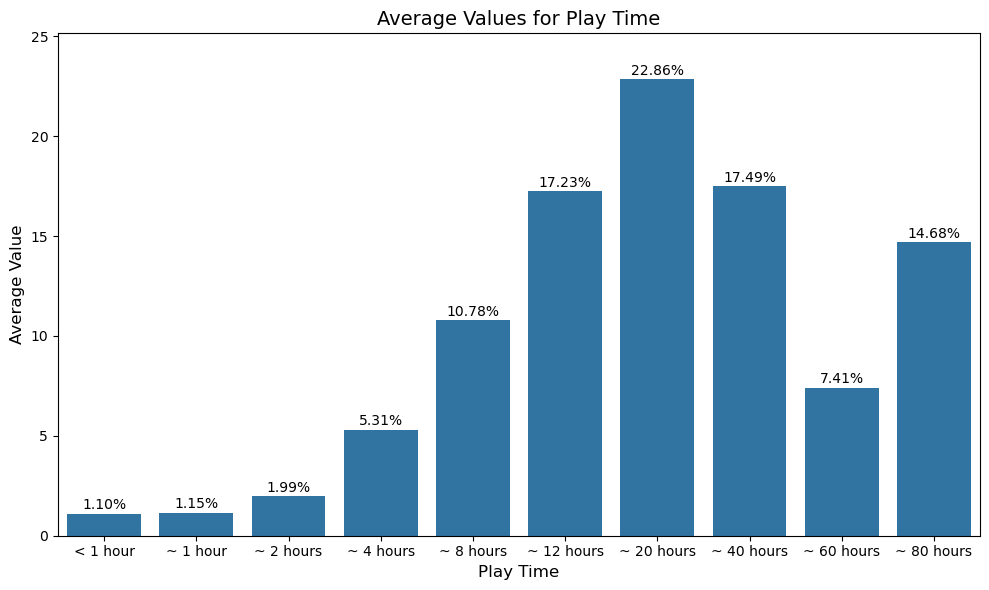

In [ ]:
# Create a bar chart
plt.figure(figsize = (10, 6))

ax = sns.barplot(x = total_averages[cols_play_time].index, y = total_averages[cols_play_time].values)
ax.bar_label(ax.containers[0], label_type = 'edge', padding = 1, fmt = '{:,.2f}%')
ax.margins(y = 0.1)

plt.title("Average Values for Play Time", fontsize = 14)
plt.ylabel("Average Value", fontsize = 12)
plt.xlabel("Play Time", fontsize = 12)
plt.xticks(total_averages[cols_play_time].index, ['< 1 hour', '~ 1 hour', '~ 2 hours', '~ 4 hours', '~ 8 hours', '~ 12 hours', '~ 20 hours', '~ 40 hours', '~ 60 hours', '~ 80 hours'])

plt.tight_layout()
plt.show()

In [ ]:
sns.histplot(x = 'play_time', data = avarages_grouped)#, ax = ax)

# fig.tight_layout()

# plt.savefig('/content/drive/MyDrive/Data Scientest - Project/05. Sentiment Analysis/Users Reviews/User Reviews vs Genre/X_features Histograms for Genre.png')

plt.show()

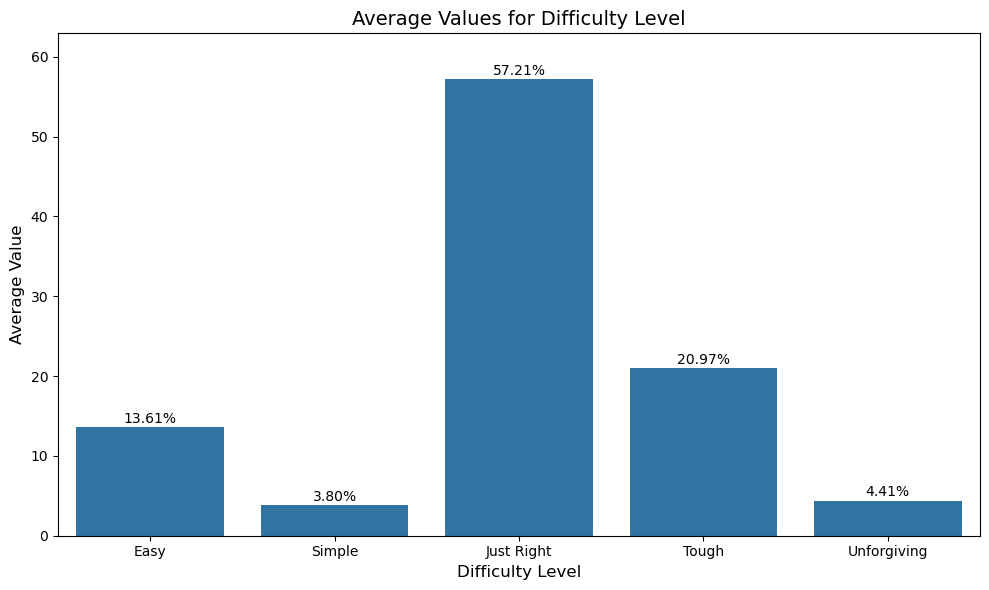

In [ ]:
# Create a bar chart
plt.figure(figsize = (10, 6))

ax = sns.barplot(x = total_averages[cols_difficulty].index, y = total_averages[cols_difficulty].values)
ax.bar_label(ax.containers[0], label_type = 'edge', padding = 1, fmt = '{:,.2f}%')
ax.margins(y = 0.1)

plt.title("Average Values for Difficulty Level", fontsize = 14)
plt.ylabel("Average Value", fontsize = 12)
plt.xlabel("Difficulty Level", fontsize = 12)
plt.xticks(total_averages[cols_difficulty].index, ['Easy', 'Simple', 'Just Right', 'Tough', 'Unforgiving'])

plt.tight_layout()
plt.show()

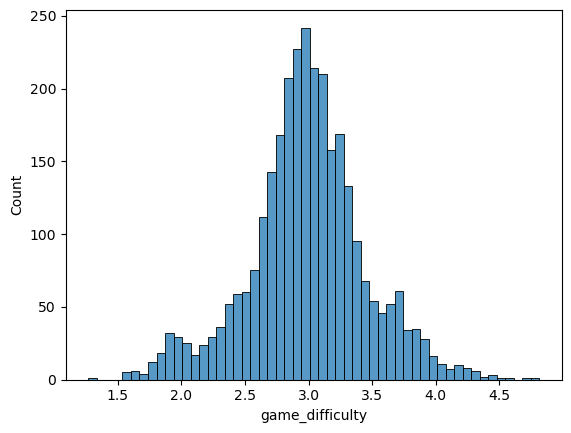

In [ ]:
sns.histplot(x = 'game_difficulty', data = avarages_grouped)#, ax = ax)

# fig.tight_layout()

# plt.savefig('/content/drive/MyDrive/Data Scientest - Project/05. Sentiment Analysis/Users Reviews/User Reviews vs Genre/X_features Histograms for Genre.png')

plt.show()

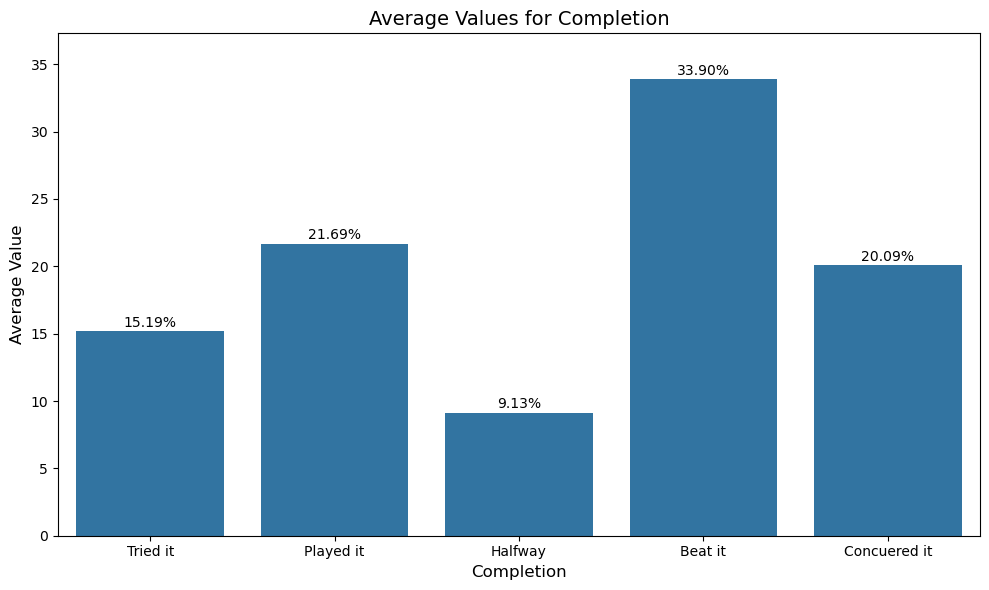

In [ ]:
# Create a bar chart
plt.figure(figsize = (10, 6))

ax = sns.barplot(x = total_averages[cols_completion].index, y = total_averages[cols_completion].values)
ax.bar_label(ax.containers[0], label_type = 'edge', padding = 1, fmt = '{:,.2f}%')
ax.margins(y = 0.1)

plt.title("Average Values for Completion", fontsize = 14)
plt.ylabel("Average Value", fontsize = 12)
plt.xlabel("Completion", fontsize = 12)
plt.xticks(total_averages[cols_completion].index, ['Tried it', 'Played it', 'Halfway', 'Beat it', 'Concuered it'])

plt.tight_layout()
plt.show()

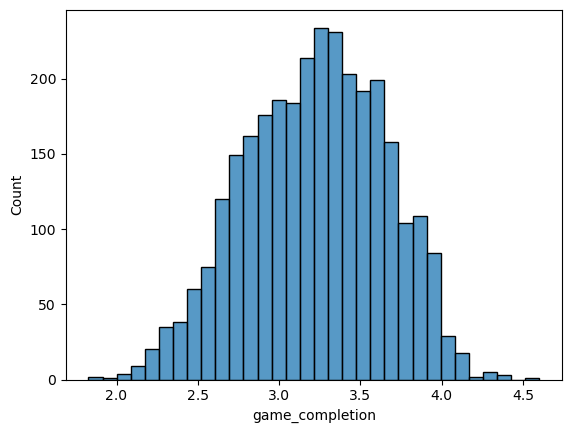

In [ ]:
sns.histplot(x = 'game_completion', data = avarages_grouped)#, ax = ax)

# fig.tight_layout()

# plt.savefig('/content/drive/MyDrive/Data Scientest - Project/05. Sentiment Analysis/Users Reviews/User Reviews vs Genre/X_features Histograms for Genre.png')

plt.show()

In [ ]:
# Map the target value with numeric values
df_games_reviews['genre_num'] = df_games_reviews.genre.map({
    'Action': 0,
    'Shooter': 1,
    'Role-Playing': 2,
    'Platform': 3,
    'Sports': 4,
    'Racing': 5,
    'Strategy': 6,
    'Fighting': 7,
    'Adventure': 8,
    'Misc': 9,
    'Simulation': 10,
    'Puzzle' : 11
})

# # Drop the 'genre' column, as not needed anymore
# df_games_reviews = df_games_reviews.drop('genre', axis = 1)


In [ ]:
df_games_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103404 entries, 0 to 103403
Data columns (total 44 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   game_title               103404 non-null  object 
 1   platform                 103404 non-null  object 
 2   global_user_score        103404 non-null  float64
 3   user_score               103404 non-null  int64  
 4   username                 103404 non-null  object 
 5   review_text              103404 non-null  object 
 6   original_english         103404 non-null  int64  
 7   review_translated        103404 non-null  object 
 8   translated_english       103404 non-null  int64  
 9   english_total            103404 non-null  int64  
 10  review_preprocessed      103027 non-null  object 
 11  user_review_count        103404 non-null  float64
 12  critic_review_count      103404 non-null  float64
 13  avg_rank                 103404 non-null  float64
 14  year

In [ ]:
# Rename columns 'year', 'difficulty' and 'completion' in the DataFrane
df_games_reviews = df_games_reviews.rename({'year': 'release_year',
                                            'difficulty': 'game_difficulty',
                                            'completion': 'game_completion'}, axis = 1)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103404 entries, 0 to 103403
Data columns (total 44 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   game_title               103404 non-null  object 
 1   platform                 103404 non-null  object 
 2   global_user_score        103404 non-null  float64
 3   user_score               103404 non-null  int64  
 4   username                 103404 non-null  object 
 5   review_text              103404 non-null  object 
 6   original_english         103404 non-null  int64  
 7   review_translated        103404 non-null  object 
 8   translated_english       103404 non-null  int64  
 9   english_total            103404 non-null  int64  
 10  review_preprocessed      103027 non-null  object 
 11  user_review_count        103404 non-null  float64
 12  critic_review_count      103404 non-null  float64
 13  avg_rank                 103404 non-null  float64
 14  rele

In [ ]:
df_games_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103404 entries, 0 to 103403
Data columns (total 44 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   game_title               103404 non-null  object 
 1   platform                 103404 non-null  object 
 2   global_user_score        103404 non-null  float64
 3   user_score               103404 non-null  int64  
 4   username                 103404 non-null  object 
 5   review_text              103404 non-null  object 
 6   original_english         103404 non-null  int64  
 7   review_translated        103404 non-null  object 
 8   translated_english       103404 non-null  int64  
 9   english_total            103404 non-null  int64  
 10  review_preprocessed      103027 non-null  object 
 11  user_review_count        103404 non-null  float64
 12  critic_review_count      103404 non-null  float64
 13  avg_rank                 103404 non-null  float64
 14  rele

In [ ]:
cols_difficulty

['difficulty_easy',
 'difficulty_simple',
 'difficulty_just_right',
 'difficulty_tough',
 'difficulty_unforgiving']

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (30, 30))

sns.heatmap(df_games_reviews.drop(cols_play_time + cols_difficulty + cols_completion + ['original_english', 'translated_english', 'english_total'], axis = 1).
            select_dtypes('number').corr(), annot = True, annot_kws={"size": 20}, fmt = '0.2f', cmap = 'Blues')
plt.yticks(rotation = 'horizontal', fontsize = 20)
plt.xticks(fontsize = 20, rotation = 90)
plt.title('Correlation Matrix for numerical Variables')
plt.savefig('Correlation Matrix Raw for Genre.png')
plt.show()

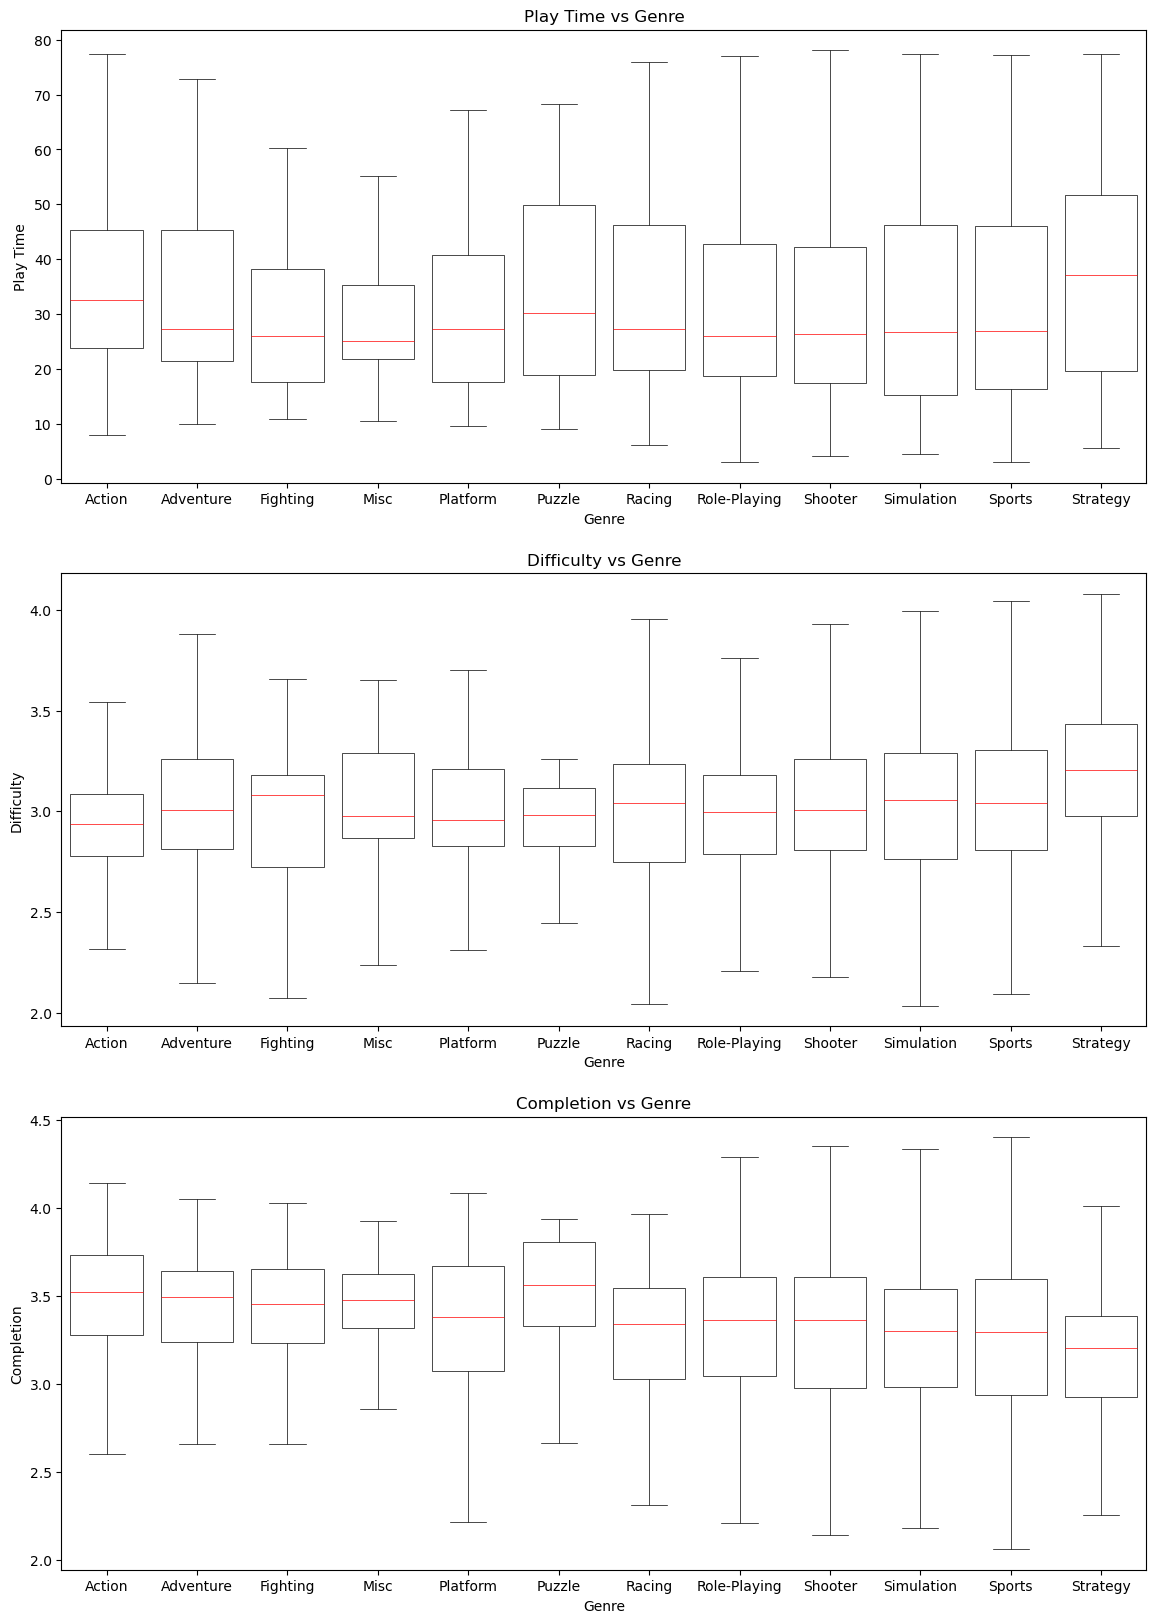

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(3, 1, figsize = (14, 20))

props = {
    'boxprops':{'facecolor': 'white',
                'edgecolor':'black'},
    'medianprops':{'color':'red'},
    'whiskerprops':{'color':'black'},
    'capprops':{'color':'black'}
}

sns.boxplot(x = np.sort(df_games_reviews.genre), y = 'play_time', data = df_games_reviews, ax = axs[0], color = 'lightblue',
                  showfliers = False, linewidth = 0.5, **props)
axs[0].set_title('Play Time vs Genre')
axs[0].set_xlabel('Genre')
axs[0].set_ylabel('Play Time')

sns.boxplot(x = np.sort(df_games_reviews.genre), y = 'game_difficulty', data = df_games_reviews, ax = axs[1], color = 'lightblue',
                  showfliers = False, linewidth = 0.5, **props)
axs[1].set_title('Difficulty vs Genre')
axs[1].set_xlabel('Genre')
axs[1].set_ylabel('Difficulty')

sns.boxplot(x = np.sort(df_games_reviews.genre), y = 'game_completion', data = df_games_reviews, ax = axs[2], color = 'lightblue',
                  showfliers = False, linewidth = 0.5, **props)
axs[2].set_title('Completion vs Genre')
axs[2].set_xlabel('Genre')
axs[2].set_ylabel('Completion')

plt.show()

In [1]:
import pandas as pd

df_games_reviews = pd.read_csv('all_user_reviews_translated_preprocessed_with_games_data_streamlit.csv')

In [2]:
df_games_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101601 entries, 0 to 101600
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   game_title           101601 non-null  object 
 1   platform             101601 non-null  object 
 2   global_user_score    101601 non-null  float64
 3   user_score           101601 non-null  int64  
 4   review_text          101601 non-null  object 
 5   review_preprocessed  101601 non-null  object 
 6   user_review_count    101601 non-null  float64
 7   critic_review_count  101601 non-null  float64
 8   avg_rank             101601 non-null  float64
 9   release_year         101601 non-null  float64
 10  genre                101601 non-null  object 
 11  publisher            101601 non-null  object 
 12  jp_sales             101601 non-null  float64
 13  total_sales          101601 non-null  float64
 14  metascore            101601 non-null  float64
 15  play_time        

In [4]:
# Define lists for numeric feature types
# num_features = df_games_reviews.drop(cols_play_time + cols_difficulty + cols_completion + \
#                                      ['original_english', 'translated_english', 'english_total', 'genre_num'], axis = 1). \
#                                      select_dtypes('number').columns.tolist()

num_features = df_games_reviews.drop('genre_num', axis = 1).select_dtypes('number').columns.tolist()

print(num_features)


['global_user_score', 'user_score', 'user_review_count', 'critic_review_count', 'avg_rank', 'release_year', 'jp_sales', 'total_sales', 'metascore', 'play_time', 'game_difficulty', 'game_completion']


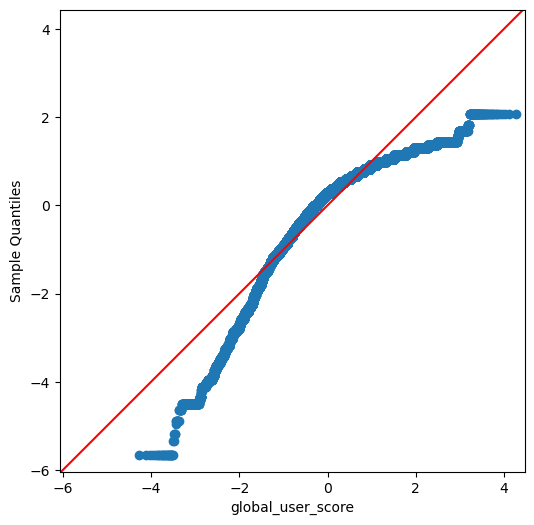

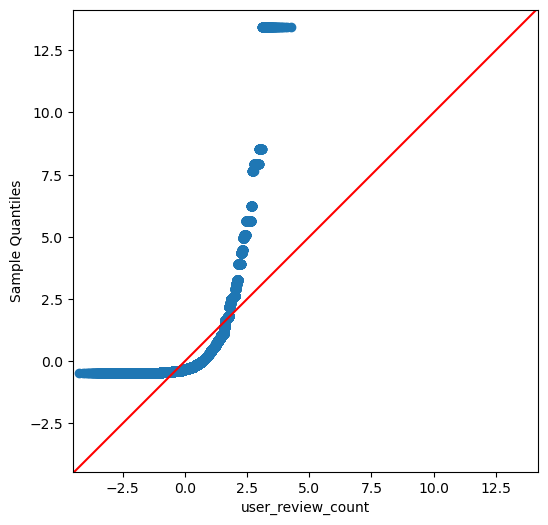

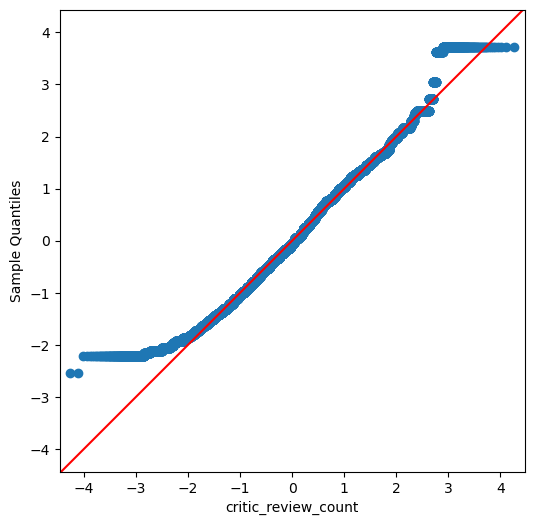

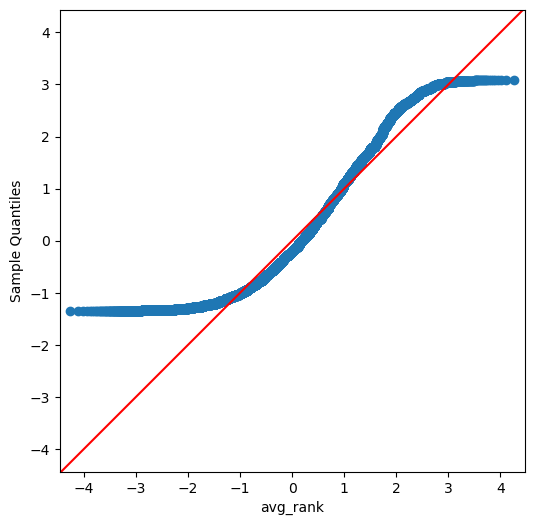

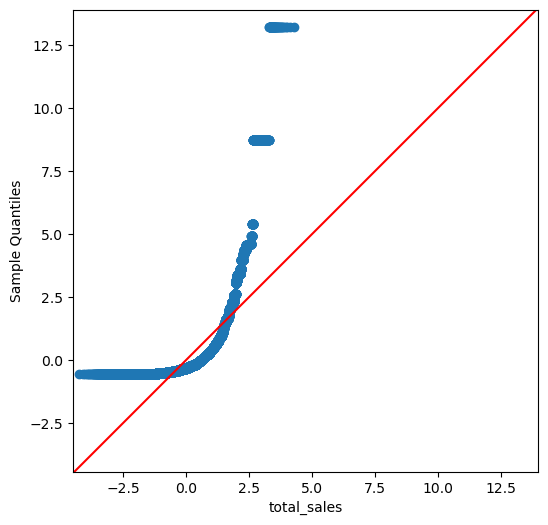

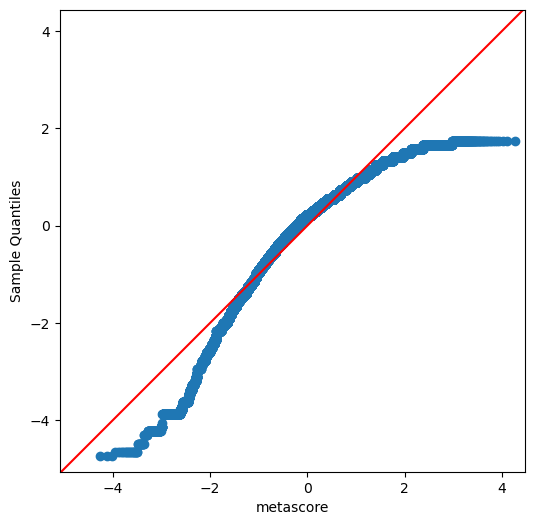

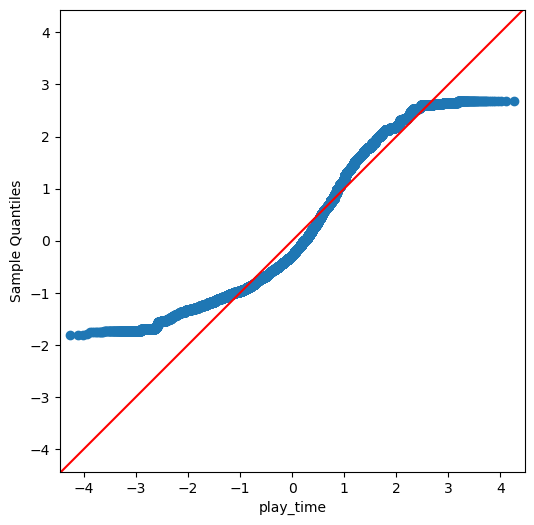

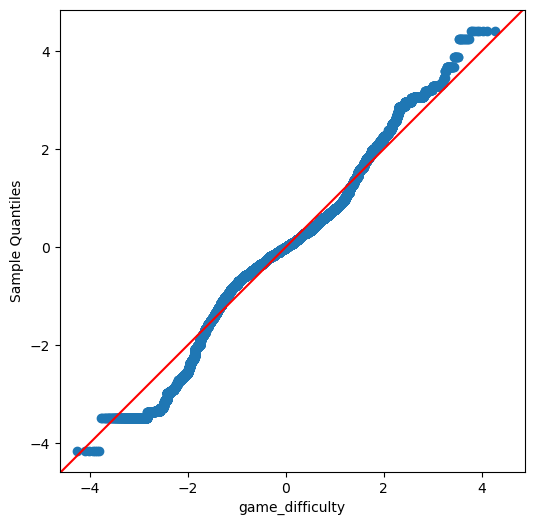

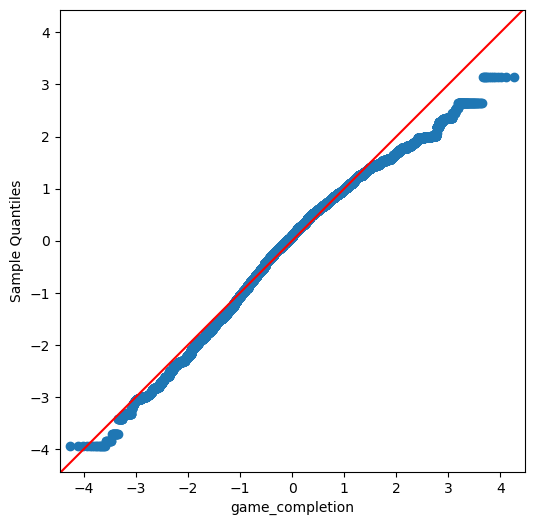

In [15]:
# Check normality of the numerical features
import statsmodels.api as sm
import matplotlib.pyplot as plt

for col in num_features:
    fig = plt.figure(figsize = (6, 6))
    ax = fig.add_subplot(111)
    sm.qqplot(df_games_reviews[col], fit = True, line = '45', xlabel = col, ax = ax)  # Q-Qplot
    ax.set_aspect('equal', adjustable = 'datalim')
    # plt.title(col)
    plt.savefig(f'Q-Q Plot (normality) {col}.png')
    plt.show()

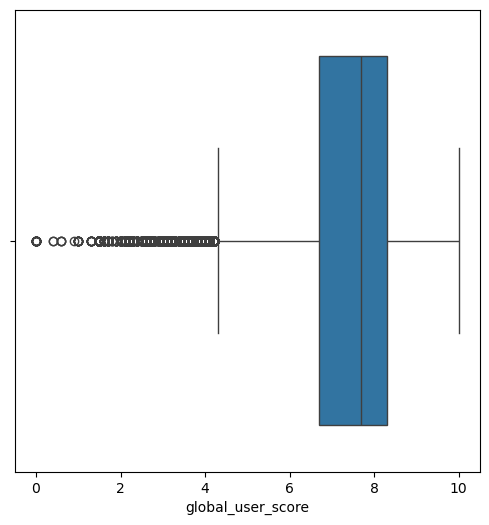

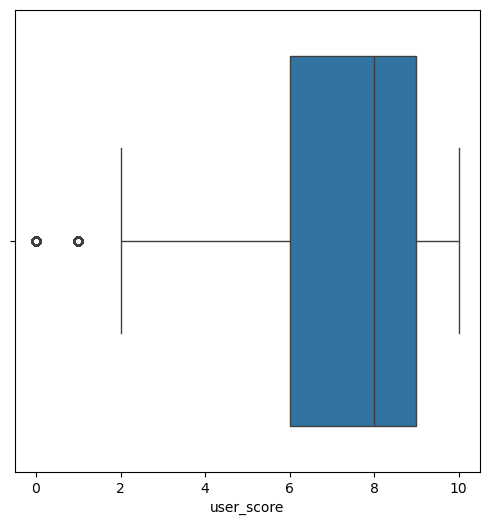

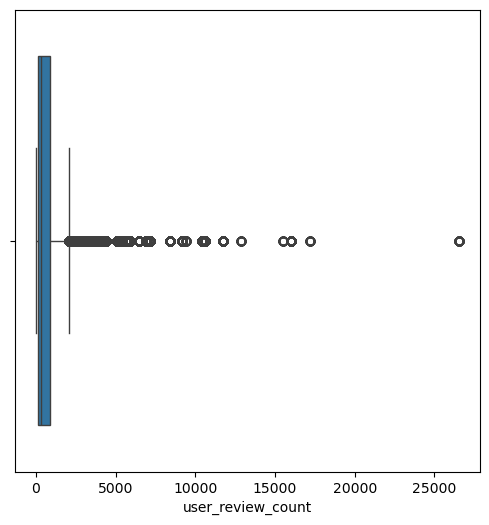

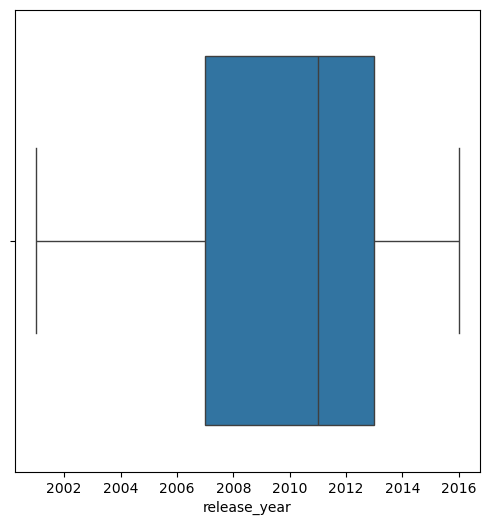

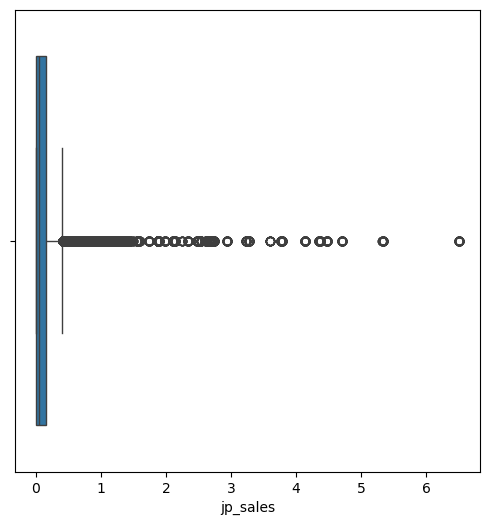

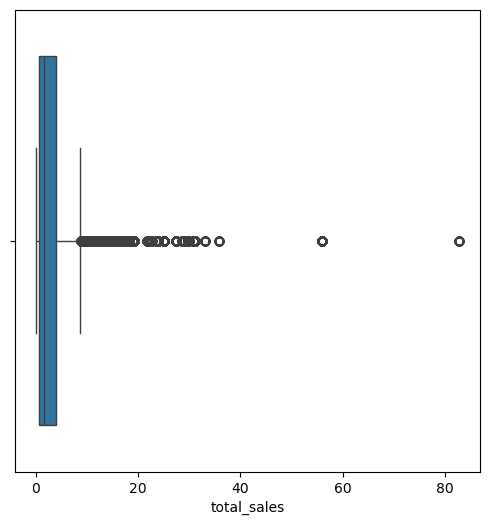

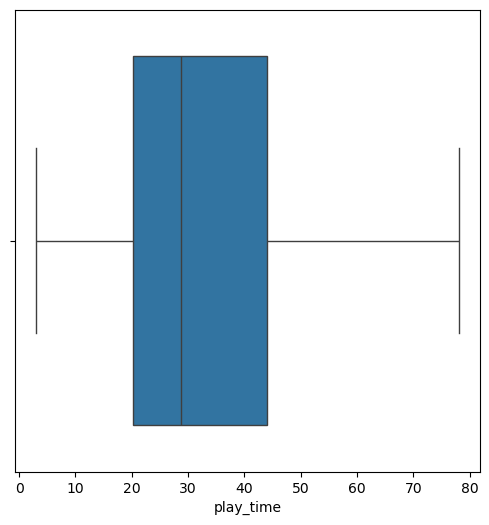

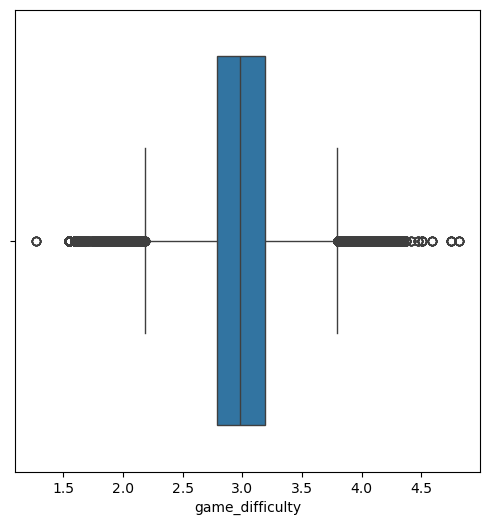

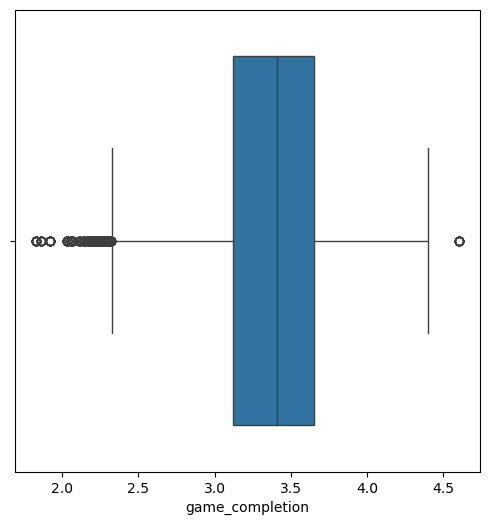

In [18]:
# Check normality of the numerical features
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

for col in num_features:
    plt.figure(figsize = (6, 6))
    sns.boxplot(x = col, data = df_games_reviews)
    plt.savefig(f'Boxplot {col}.png')
    plt.show()

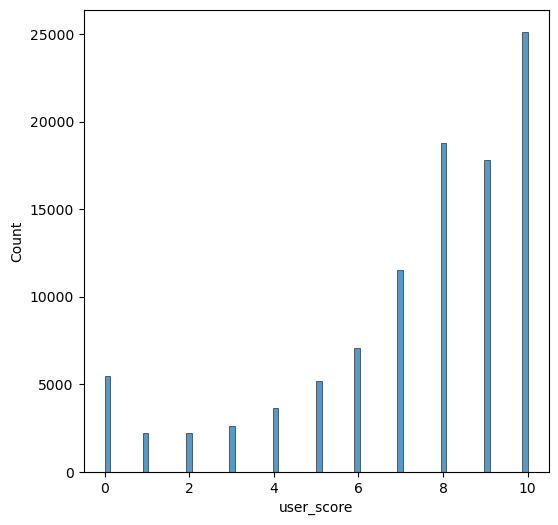

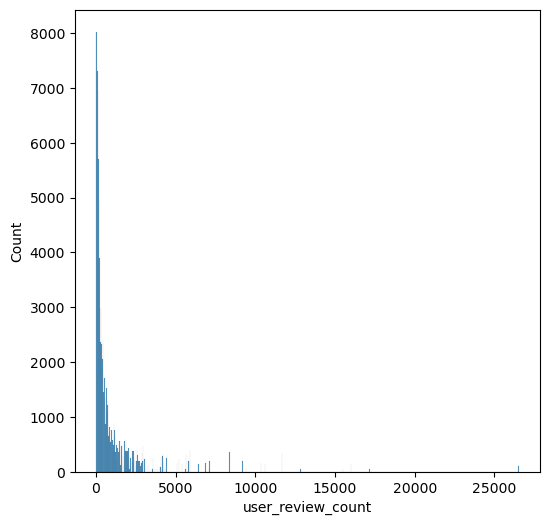

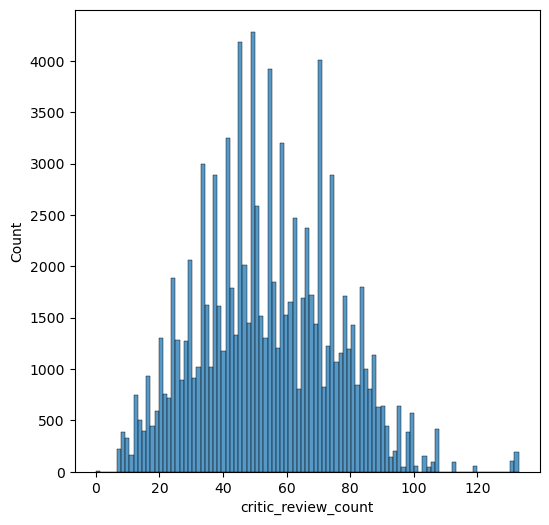

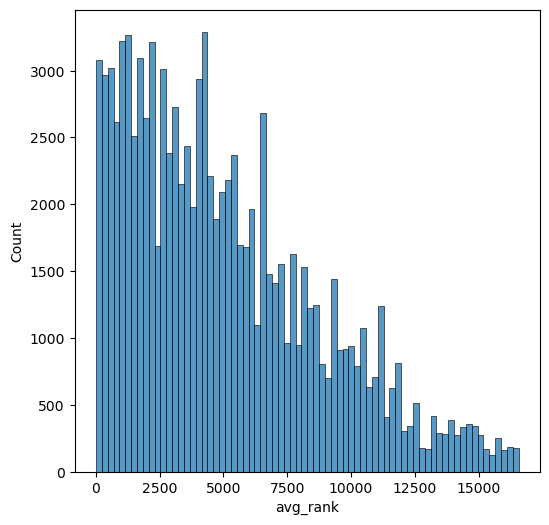

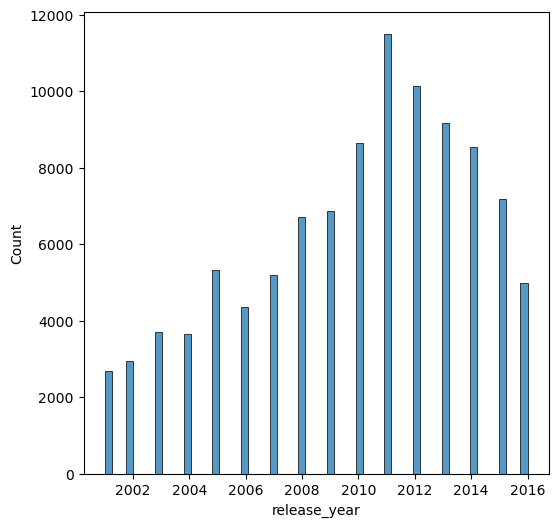

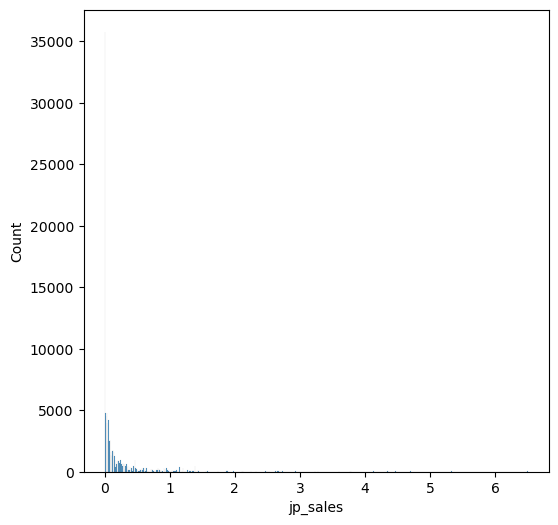

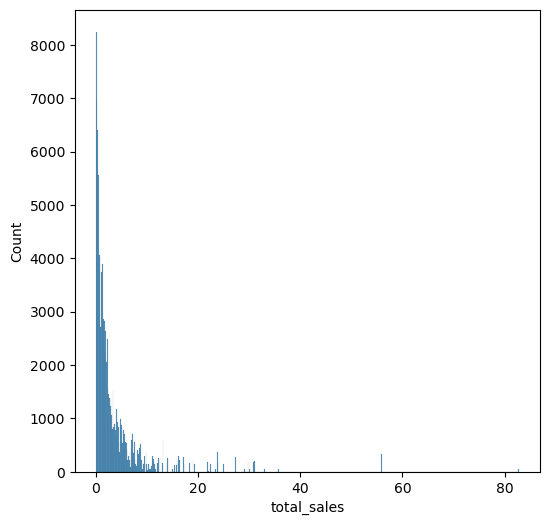

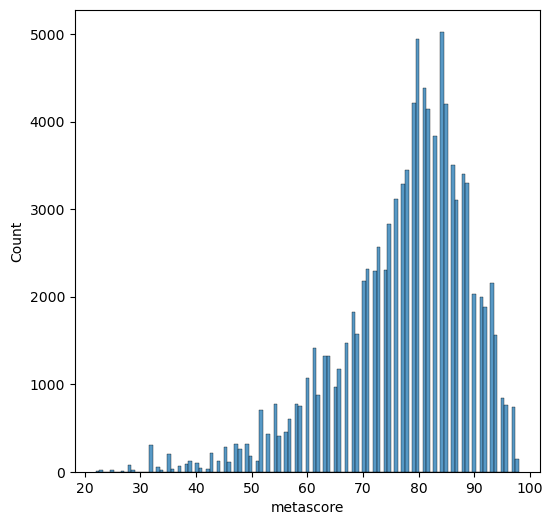

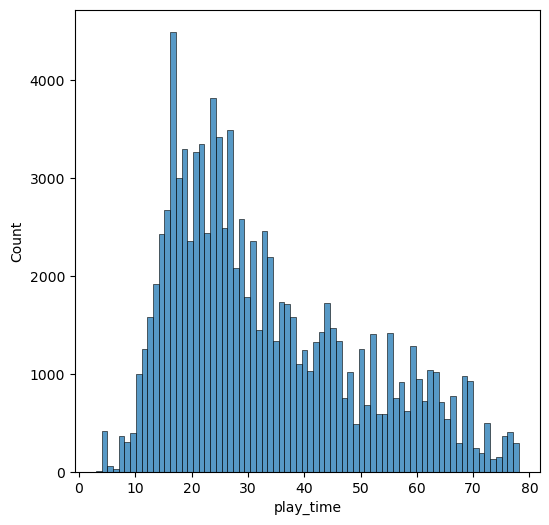

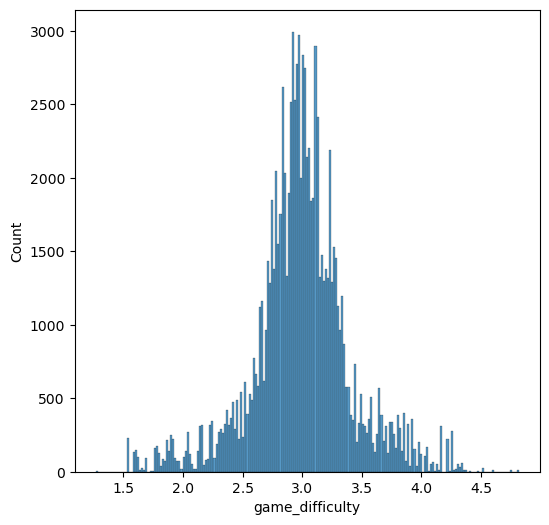

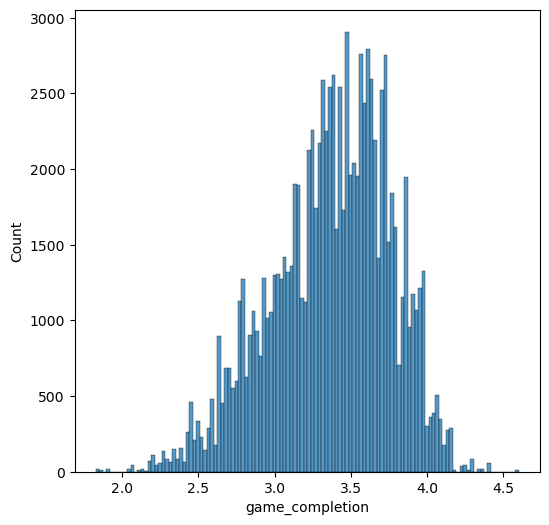

In [19]:
# Check normality of the numerical features
import statsmodels.api as sm
import matplotlib.pyplot as plt

for col in num_features:
    plt.figure(figsize = (6, 6))
    sns.histplot(x = col, data = df_games_reviews)
    plt.savefig(f'Histogramm {col}.png')
    plt.show()

> *We chose the scaler according to the distribution of the feature values as follows:*  
> - *StandardScaler for features with normal distributions:*  
>> *critic_review_count*  
>> *game_difficulty*  
>> *game_completion*  
> - *MinMaxScaler for features with known, bounded ranges:*   
>> *play_time*  
>> *metascore*  
>> *release_year*  
>> *global_user_score*  
>> *user_score*  
> - *RobustScaler for features with possible outliers:*  
>> *jp_sales*  
>> *total_sales*  
>> *avg_rank*  
>> *user_review_count*

#### Recalculation of Game Difficulty and Completion

In [ ]:
my_list = list(range(10, 60))

print(my_list)

[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]


In [ ]:
grouped_list = []
values_list = []

for i in range(10, 60):
    grouped_list.append(my_list[i-10] // 10)
    values_list.append(my_list[i-10] / 10)

print(grouped_list)
print(values_list)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
[1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9]


# 2. Text Mining for Genre Prediction

### 2.1.5 Preprocess numeric features in the resampled Training Set and transform X_test

In [ ]:
# Load dataframe with X_train_resampled and y_train_resampled from the csv file
import pandas as pd

df_games_reviews_train_resampled = pd.read_csv('/content/drive/MyDrive/Data Scientest - Project/05. Sentiment Analysis/Users Reviews/User Reviews vs Genre/Streamlit/reduced_user_reviews_with_games_data_X_y_train_resampled.csv')
# X_train_resampled = pd.read_csv('reduced_user_reviews_with_games_data_X_y_train_resampled.csv')

y_train_resampled = df_games_reviews_train_resampled.genre_num
X_train_resampled = df_games_reviews_train_resampled.drop('genre_num', axis = 1)

In [ ]:
# Load dataframe with X_test_cat_preprocessed and y_test from the csv file
import pandas as pd

df_games_reviews_test_cat_preprocessed = pd.read_csv('/content/drive/MyDrive/Data Scientest - Project/05. Sentiment Analysis/Users Reviews/User Reviews vs Genre/Streamlit/reduced_user_reviews_with_games_data_X_y_test_cat_preprocessed.csv')
# df_games_reviews_test_cat_preprocessed = pd.read_csv('reduced_user_reviews_with_games_data_X_y_test_cat_preprocessed.csv')

y_test = df_games_reviews_test_cat_preprocessed.genre_num
X_test_cat_preprocessed = df_games_reviews_test_cat_preprocessed.drop('genre_num', axis = 1)

In [ ]:
features_drop = ['critic_review_count', \
                 'global_user_score', \
                 'metascore', \
                 'play_time', \
                 'jp_sales', \
                 'total_sales', \
                 'avg_rank', \
                 'user_review_count']

X_train_resampled = X_train_resampled.drop(features_drop, axis = 1)
X_test_cat_preprocessed = X_test_cat_preprocessed.drop(features_drop, axis = 1)

In [ ]:
display(X_train_resampled.iloc[:, :20].head())
display(X_test_cat_preprocessed.iloc[:, :20].head())

user_score  release_year  game_difficulty  game_completion  \
0           2        2012.0           2.9652           3.7179   
1           8        2008.0           2.5209           2.7563   
2           9        2011.0           2.7583           3.7695   
3           5        2012.0           3.0081           3.2805   
4           7        2015.0           2.9831           3.0354   

   platform_dreamcast  platform_ds  platform_game-boy-advance  \
0                 0.0          0.0                        0.0   
1                 0.0          0.0                        0.0   
2                 0.0          0.0                        0.0   
3                 0.0          0.0                        0.0   
4                 0.0          0.0                        0.0   

   platform_gamecube  platform_ios-iphoneipad  platform_nintendo-64  \
0                0.0                      0.0                   0.0   
1                0.0                      0.0                   0.0   
2                0.0                      0.0                   0.0   
3                0.0                      0.0                   0.0   
4                0.0                      0.0                   0.0   

   platform_nintendo-switch  platform_pc  platform_playstation  \
0                       0.0          0.0                   0.0   
1                       0.0          0.0                   0.0   
2                       0.0          0.0                   0.0   
3                       0.0          1.0                   0.0   
4                       0.0          0.0                   0.0   

   platform_playstation-2  platform_playstation-3  platform_playstation-4  \
0                     0.0                     0.0                     0.0   
1                     0.0                     0.0                     1.0   
2                     0.0                     0.0                     0.0   
3                     0.0                     0.0                     0.0   
4                     0.0                     0.0                     0.0   

   platform_playstation-5  platform_playstation-vita  platform_psp  \
0                     0.0                        0.0           0.0   
1                     0.0                        0.0           0.0   
2                     0.0                        0.0           0.0   
3                     0.0                        0.0           0.0   
4                     0.0                        0.0           0.0   

   platform_wii  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0

user_score  release_year  game_difficulty  game_completion  \
0           9        2013.0           2.7232           3.6142   
1          10        2004.0           2.7832           3.8611   
2          10        2004.0           2.9152           3.7942   
3           7        2002.0           3.0199           3.1734   
4          10        2015.0           3.6581           3.6328   

   platform_dreamcast  platform_ds  platform_game-boy-advance  \
0                 0.0          0.0                        0.0   
1                 0.0          0.0                        0.0   
2                 0.0          0.0                        0.0   
3                 0.0          0.0                        0.0   
4                 0.0          0.0                        0.0   

   platform_gamecube  platform_ios-iphoneipad  platform_nintendo-64  \
0                0.0                      0.0                   0.0   
1                0.0                      0.0                   0.0   
2                0.0                      0.0                   0.0   
3                0.0                      0.0                   0.0   
4                0.0                      0.0                   0.0   

   platform_nintendo-switch  platform_pc  platform_playstation  \
0                       0.0          0.0                   0.0   
1                       0.0          0.0                   0.0   
2                       1.0          0.0                   0.0   
3                       0.0          0.0                   0.0   
4                       0.0          0.0                   0.0   

   platform_playstation-2  platform_playstation-3  platform_playstation-4  \
0                     0.0                     0.0                     0.0   
1                     1.0                     0.0                     0.0   
2                     0.0                     0.0                     0.0   
3                     1.0                     0.0                     0.0   
4                     0.0                     0.0                     1.0   

   platform_playstation-5  platform_playstation-vita  platform_psp  \
0                     0.0                        0.0           0.0   
1                     0.0                        0.0           0.0   
2                     0.0                        0.0           0.0   
3                     0.0                        0.0           0.0   
4                     0.0                        0.0           0.0   

   platform_wii  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0

In [ ]:
# Define separate lists for numerical features according to different scaler applied
# num_features_standard = ['critic_review_count', 'game_difficulty', 'game_completion'] # Features for StandardScaler
# num_features_minmax = ['global_user_score', 'user_score', 'release_year', 'metascore', 'play_time'] # Features for MinMaxScaler
# num_features_robust = ['jp_sales', 'total_sales', 'avg_rank', 'user_review_count'] # Features for RobustScaler

num_features_standard_demo = ['game_difficulty', 'game_completion'] # Features for StandardScaler
num_features_minmax_demo = ['user_score', 'release_year'] # Features for MinMaxScaler
# num_features_robust = ['jp_sales', 'total_sales', 'avg_rank', 'user_review_count'] # Features for RobustScaler

num_features_demo = num_features_standard_demo + num_features_minmax_demo

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler#, RobustScaler

# Instantiate tranfromers
standard_sc_genre_demo = StandardScaler()
minmax_sc_genre_demo = MinMaxScaler()
# robust_sc_genre = RobustScaler()


In [ ]:
# Fit transformers on X_train_resampled
X_train_resampled_standard_demo = standard_sc_genre_demo.fit_transform(X_train_resampled[num_features_standard_demo])
X_train_resampled_minmax_demo = minmax_sc_genre_demo.fit_transform(X_train_resampled[num_features_minmax_demo])
# X_train_resampled_robust = robust_sc_genre.fit_transform(X_train_resampled[num_features_robust])


In [ ]:
# Save Preprocessing Steps for later usage after the model was trained
from joblib import dump

# Save Scalers
dump(standard_sc_genre_demo, "/content/drive/MyDrive/Data Scientest - Project/05. Sentiment Analysis/Users Reviews/User Reviews vs Genre/Streamlit/XGBoost Classifier Genre with Optuna Demo/standard_sc_genre_demo.pkl")
dump(minmax_sc_genre_demo, "/content/drive/MyDrive/Data Scientest - Project/05. Sentiment Analysis/Users Reviews/User Reviews vs Genre/Streamlit/XGBoost Classifier Genre with Optuna Demo/minmax_sc_genre_demo.pkl")
# dump(robust_sc_genre, "/content/drive/MyDrive/Data Scientest - Project/05. Sentiment Analysis/Users Reviews/User Reviews vs Genre/Streamlit/XGBoost Classifier Genre with Optuna Demo/robust_sc_genre_demo.pkl")


['/content/drive/MyDrive/Data Scientest - Project/05. Sentiment Analysis/Users Reviews/User Reviews vs Genre/Streamlit/XGBoost Classifier Genre with Optuna Demo/minmax_sc_genre_demo.pkl']

In [ ]:
# Save fit transformed X_train_resampled to dataframes
X_train_resampled_standard_demo = pd.DataFrame(X_train_resampled_standard_demo,
                                               columns = num_features_standard_demo,
                                               index = X_train_resampled.index)

X_train_resampled_minmax_demo = pd.DataFrame(X_train_resampled_minmax_demo,
                                             columns = num_features_minmax_demo,
                                             index = X_train_resampled.index)

# X_train_resampled_robust = pd.DataFrame(X_train_resampled_robust, columns = num_features_robust, index = X_train_resampled.index)

In [ ]:
# Concatenate all X_train_resampled dataframes together
X_train_resampled_preprocessed_demo = pd.concat([X_train_resampled_standard_demo,
                                                 X_train_resampled_minmax_demo,
                                                #  X_train_resampled_robust,
                                                 X_train_resampled.drop(num_features_demo, axis = 1)],
                                                axis = 1)

In [ ]:
print(X_train_resampled_preprocessed_demo.shape)

(153144, 5187)


In [ ]:
# Apply Transformers on X_test_cat_preprocessed
X_test_standard_demo = standard_sc_genre_demo.transform(X_test_cat_preprocessed[num_features_standard_demo])
X_test_minmax_demo = minmax_sc_genre_demo.transform(X_test_cat_preprocessed[num_features_minmax_demo])
# X_test_robust = robust_sc_genre.transform(X_test_cat_preprocessed[num_features_robust])

In [ ]:
# Save transformed X_test_cat_preprocessed to dataframes
X_test_standard_demo = pd.DataFrame(X_test_standard_demo,
                                    columns = num_features_standard_demo,
                                    index = X_test_cat_preprocessed.index)

X_test_minmax_demo = pd.DataFrame(X_test_minmax_demo,
                                  columns = num_features_minmax_demo,
                                  index = X_test_cat_preprocessed.index)

# X_test_robust = pd.DataFrame(X_test_robust, columns = num_features_robust, index = X_test_cat_preprocessed.index)

In [ ]:
# Concatenate all X_test dataframes together
X_test_preprocessed_demo = pd.concat([X_test_standard_demo,
                                      X_test_minmax_demo,
                                    #   X_test_robust,
                                      X_test_cat_preprocessed.drop(num_features_demo, axis = 1)],
                                      axis = 1)

#### Checkpoint: Save Games Reviews Resampled Preprocessed (X_train_resampled_preprocessed/y_resampled)

In [ ]:
# # Merge X_train_resampled and y_train_resampled to save them in a csv file
# df_games_reviews_train_resampled_preprocessed_demo = X_train_resampled_preprocessed_demo.copy()
# df_games_reviews_train_resampled_preprocessed_demo['genre_num'] = y_train_resampled

# df_games_reviews_train_resampled_preprocessed_demo.shape

(153144, 5188)

In [ ]:
# # Save the dataframe with X_train_resampled_preprocessed and y_train_resampled to a csv file
# df_games_reviews_train_resampled_preprocessed_demo.to_csv('/content/drive/MyDrive/Data Scientest - Project/05. Sentiment Analysis/Users Reviews/User Reviews vs Genre/Streamlit/reduced_user_reviews_with_games_data_X_y_train_resampled_preprocessed_demo.csv', index = False)

#### Checkpoint: Save Test Data Preprocessed (X_test_preprocessed/y_test)

In [ ]:
# Merge X_test and y_test to save them in a csv file
df_games_reviews_test_preprocessed_demo = X_test_preprocessed_demo.copy()
df_games_reviews_test_preprocessed_demo['genre_num'] = y_test

df_games_reviews_test_preprocessed_demo.shape

(15037, 5188)

In [ ]:
# Save the preprocessed test dataframe to a csv file
df_games_reviews_test_preprocessed_demo.to_csv('/content/drive/MyDrive/Data Scientest - Project/05. Sentiment Analysis/Users Reviews/User Reviews vs Genre/Streamlit/reduced_user_reviews_with_games_data_X_y_test_preprocessed_demo.csv', index = False)

### 2.1.6 Create Smaller Subset for accelerated Modelling

In [ ]:
# # Load the dataframe with X_train_resampled_prepocessed and y_train_resampled from the csv file
# import pandas as pd

# df_games_reviews_train_resampled_preprocessed_demo = pd.read_csv('/content/drive/MyDrive/Data Scientest - Project/05. Sentiment Analysis/Users Reviews/User Reviews vs Genre/Streamlit/reduced_user_reviews_with_games_data_X_y_train_resampled_preprocessed_demo.csv')
# # X_train_resampled = pd.read_csv('all_user_reviews_with_games_data_X_y_train_resampled.csv')

# y_train_resampled_demo = df_games_reviews_train_resampled_preprocessed_demo.genre_num
# X_train_resampled_preprocessed_demo = df_games_reviews_train_resampled_preprocessed_demo.drop('genre_num', axis = 1)

In [ ]:
# Calculate test_size for X_train_sample
size_X_test_sample_demo = round(1 - 15000/X_train_resampled_preprocessed_demo.shape[0], 3)

print(size_X_test_sample_demo)

0.902


In [ ]:
from sklearn.model_selection import train_test_split

# Sampling with train-test split
X_train_sample_demo, _, y_train_sample, _ = train_test_split(X_train_resampled_preprocessed_demo,
                                                             y_train_resampled,
                                                             test_size = 0.902,
                                                             random_state = 48,
                                                             stratify = y_train_resampled)

In [ ]:
print('y_train_sample class distribution:', y_train_sample.value_counts())
print('y_test class distribution:', y_test.value_counts())

y_train_sample class distribution: genre_num
6     1251
11    1251
1     1251
9     1251
5     1251
10    1251
2     1251
7     1251
4     1250
0     1250
8     1250
3     1250
Name: count, dtype: int64
y_test class distribution: genre_num
0     4435
1     2729
2     2126
3     1062
4     1006
5      936
7      620
6      610
8      601
9      445
10     335
11     132
Name: count, dtype: int64


In [ ]:
print(X_train_sample_demo.shape)
print(X_test_preprocessed_demo.shape)
print('y_train_sample class distribution:', round(y_train_sample.value_counts(normalize = True)*100, 2), '%')
print('y_test class distribution:', round(y_test.value_counts(normalize = True)*100, 2), '%')

(15008, 5187)
(15037, 5187)
y_train_sample class distribution: genre_num
6     8.34
11    8.34
1     8.34
9     8.34
5     8.34
10    8.34
2     8.34
7     8.34
4     8.33
0     8.33
8     8.33
3     8.33
Name: proportion, dtype: float64 %
y_test class distribution: genre_num
0     29.49
1     18.15
2     14.14
3      7.06
4      6.69
5      6.22
7      4.12
6      4.06
8      4.00
9      2.96
10     2.23
11     0.88
Name: proportion, dtype: float64 %


#### Checkpoint: Save Games Reviews Sample (X_train_sample/y_train_sample)

In [ ]:
# Merge X_train_resampled and y_train_resampled to save them in a csv file
df_games_reviews_train_sample_demo = X_train_sample_demo.copy()
df_games_reviews_train_sample_demo['genre_num'] = y_train_sample

df_games_reviews_train_sample_demo.shape

(15008, 5188)

In [ ]:
# Save the dataframe with X_train_sample and y_train_sample to a csv file
df_games_reviews_train_sample_demo.to_csv('/content/drive/MyDrive/Data Scientest - Project/05. Sentiment Analysis/Users Reviews/User Reviews vs Genre/Streamlit/reduced_user_reviews_with_games_data_X_y_train_sample_demo.csv', index = False)

## 2.2 Classification Model for Genre Prediction with XGBoostClassifier (drop Features for Streamlit)

In [ ]:
# Load the dataframe with X_train_sample and y_train_sample from the csv file
import pandas as pd

# df_games_reviews_train_sample = pd.read_csv('/content/drive/MyDrive/Data Scientest - Project/05. Sentiment Analysis/Users Reviews/User Reviews vs Genre/Streamlit/reduced_user_reviews_with_games_data_X_y_train_sample_demo.csv')
df_games_reviews_train_sample_demo = pd.read_csv('reduced_user_reviews_with_games_data_X_y_train_sample_demo.csv')

X_train_sample_demo = df_games_reviews_train_sample_demo.drop('genre_num', axis = 1)
y_train_sample = df_games_reviews_train_sample_demo.genre_num

# Load the preprocessed test dataframe frin the csv file
# df_games_reviews_test_preprocessed = pd.read_csv('/content/drive/MyDrive/Data Scientest - Project/05. Sentiment Analysis/Users Reviews/User Reviews vs Genre/Streamlit/reduced_user_reviews_with_games_data_X_y_test_preprocessed_demo.csv')
df_games_reviews_test_preprocessed_demo = pd.read_csv('reduced_user_reviews_with_games_data_X_y_test_preprocessed_demo.csv')

X_test_preprocessed_demo = df_games_reviews_test_preprocessed_demo.drop('genre_num', axis = 1)
y_test = df_games_reviews_test_preprocessed_demo.genre_num

In [ ]:
print(X_test_preprocessed.isna().sum().sum())
print(y_test.isna().sum())

0
0


In [ ]:
display(X_train_sample_demo.iloc[:, :20].head())
display(X_test_preprocessed_demo.iloc[:, :20].head())

game_difficulty  game_completion  user_score  release_year  \
85128          0.097227         0.702568         1.0      0.066667   
147768         0.664669         1.370031         0.8      0.400000   
44223         -0.419880         0.671197         0.0      0.666667   
33444         -0.195919        -0.473094         0.1      0.866667   
147286         0.664669         1.370031         0.7      0.400000   

        platform_dreamcast  platform_ds  platform_game-boy-advance  \
85128                  0.0          0.0                        0.0   
147768                 0.0          1.0                        0.0   
44223                  0.0          0.0                        0.0   
33444                  0.0          0.0                        0.0   
147286                 0.0          1.0                        0.0   

        platform_gamecube  platform_ios-iphoneipad  platform_nintendo-64  \
85128                 0.0                      0.0                   0.0   
147768                0.0                      0.0                   0.0   
44223                 0.0                      0.0                   0.0   
33444                 0.0                      0.0                   0.0   
147286                0.0                      0.0                   0.0   

        platform_nintendo-switch  platform_pc  platform_playstation  \
85128                        0.0          1.0                   0.0   
147768                       0.0          0.0                   0.0   
44223                        0.0          0.0                   0.0   
33444                        0.0          0.0                   0.0   
147286                       0.0          0.0                   0.0   

        platform_playstation-2  platform_playstation-3  \
85128                      0.0                     0.0   
147768                     0.0                     0.0   
44223                      0.0                     0.0   
33444                      0.0                     1.0   
147286                     0.0                     0.0   

        platform_playstation-4  platform_playstation-5  \
85128                      0.0                     0.0   
147768                     0.0                     0.0   
44223                      0.0                     0.0   
33444                      0.0                     0.0   
147286                     0.0                     0.0   

        platform_playstation-vita  platform_psp  platform_wii  
85128                         0.0           0.0           0.0  
147768                        0.0           0.0           0.0  
44223                         0.0           0.0           1.0  
33444                         0.0           0.0           0.0  
147286                        0.0           0.0           0.0

game_difficulty  game_completion  user_score  release_year  \
0        -0.552926         0.698707         0.9      0.800000   
1        -0.419880         1.294501         1.0      0.200000   
2        -0.127178         1.133065         1.0      0.200000   
3         0.104988        -0.364987         0.7      0.066667   
4         1.520157         0.743590         1.0      0.933333   

   platform_dreamcast  platform_ds  platform_game-boy-advance  \
0                 0.0          0.0                        0.0   
1                 0.0          0.0                        0.0   
2                 0.0          0.0                        0.0   
3                 0.0          0.0                        0.0   
4                 0.0          0.0                        0.0   

   platform_gamecube  platform_ios-iphoneipad  platform_nintendo-64  \
0                0.0                      0.0                   0.0   
1                0.0                      0.0                   0.0   
2                0.0                      0.0                   0.0   
3                0.0                      0.0                   0.0   
4                0.0                      0.0                   0.0   

   platform_nintendo-switch  platform_pc  platform_playstation  \
0                       0.0          0.0                   0.0   
1                       0.0          0.0                   0.0   
2                       1.0          0.0                   0.0   
3                       0.0          0.0                   0.0   
4                       0.0          0.0                   0.0   

   platform_playstation-2  platform_playstation-3  platform_playstation-4  \
0                     0.0                     0.0                     0.0   
1                     1.0                     0.0                     0.0   
2                     0.0                     0.0                     0.0   
3                     1.0                     0.0                     0.0   
4                     0.0                     0.0                     1.0   

   platform_playstation-5  platform_playstation-vita  platform_psp  \
0                     0.0                        0.0           0.0   
1                     0.0                        0.0           0.0   
2                     0.0                        0.0           0.0   
3                     0.0                        0.0           0.0   
4                     0.0                        0.0           0.0   

   platform_wii  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0

### 2.2.1 Hyperparameter Tuning with Optuna

In [ ]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 7.7 MB/s eta 0:00:00


In [ ]:
from sklearn.metrics import accuracy_score, log_loss
import xgboost as xgb
import numpy as np
import pandas as pd
import scipy
import optuna

# Convert data to DMatrix format for XGBoost
dtrain = xgb.DMatrix(X_train_sample_demo, label = y_train_sample)
dtest = xgb.DMatrix(X_test_preprocessed_demo, label = y_test)

# Define the Optuna objective function
def objective(trial):
    # Define the hyperparameter space
    param = {
        "objective": "multi:softprob",
        "num_class": len(np.unique(y_train_sample)), # Number of classes in target variable
        "eval_metric": "mlogloss",
        "tree_method": "hist",  # Use GPU acceleration
        "device": "cuda", # Enable GPU acceleration
        'nthread': 5,  # Use 6 CPU cores
        "max_depth": trial.suggest_int("max_depth", 4, 10),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log = True),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "gamma": trial.suggest_float("gamma", 0, 5),
        "lambda": trial.suggest_float("lambda", 1e-3, 10, log = True),
        "alpha": trial.suggest_float("alpha", 1e-3, 10, log = True),
        "seed": 48,
    }

    # Train the XGBoost model
    model = xgb.train(
        param,
        dtrain,
        num_boost_round = 1000,
        evals = [(dtrain, "train"), (dtest, "validation")],
        verbose_eval = 50, # Every ten rounds
        early_stopping_rounds = 50)

    # Predict probabilities and classes
    y_pred_proba = model.predict(dtest)
    y_pred = y_pred_proba.argmax(axis = 1)

    # Calculate log loss as the objective metric
    return log_loss(y_test, y_pred_proba)

# Run Optuna optimization
study = optuna.create_study(direction = "minimize")
study.optimize(objective, n_trials = 50)

# Best parameters and evaluation
print("Best hyperparameters:", study.best_params)

# Train the final model with best hyperparameters
best_params = study.best_params
best_params.update({
    "objective": "multi:softprob",
    "num_class": len(y_train_sample.unique()),
    "eval_metric": "mlogloss",
    "tree_method": "hist",
    "device": "cuda", # Enable GPU acceleration
    "seed": 48
})

# Train the final model with early stopping
final_model = xgb.train(
    best_params,
    dtrain,
    num_boost_round = 1000,
    evals = [(dtrain, "train"), (dtest, "validation")],
    early_stopping_rounds = 50,
    verbose_eval = 50,
)

# Predict and evaluate
y_pred_proba = final_model.predict(dtest)
y_pred = y_pred_proba.argmax(axis = 1)

accuracy = accuracy_score(y_test, y_pred)
final_logloss = log_loss(y_test, y_pred_proba)

print(f"Final Model Accuracy: {accuracy:.4f}")
print(f"Final Model Log Loss: {final_logloss:.4f}")


# Save the trained XGBoost model
final_model.save_model("/content/drive/MyDrive/Data Scientest - Project/05. Sentiment Analysis/Users Reviews/User Reviews vs Genre/Streamlit/XGBoost Classifier Genre with Optuna Demo/XGBoost_genre_optuna_model_demo.json")


# Save the Best Hyperparameters
import json

with open("/content/drive/MyDrive/Data Scientest - Project/05. Sentiment Analysis/Users Reviews/User Reviews vs Genre/Streamlit/XGBoost Classifier Genre with Optuna Demo/XGBoost_genre_optuna_best_hyperparameters_demo.json", "w") as f:
    json.dump(best_params, f)


# # Save Preprocessed Data
# from scipy.sparse import csr_matrix
# from scipy.sparse import save_npz

# # Convert DataFrame to sparse matrix
# X_train_sample_sparse = csr_matrix(X_train_sample.values)
# X_test_preprocessed_sparse = csr_matrix(X_test_preprocessed.values)


from optuna.visualization import plot_param_importances

# Visualize parameter importance
plot_param_importances(study).show()


[I 2024-12-08 22:29:03,850] A new study created in memory with name: no-name-3457705b-a3d9-4078-9edc-38347c691f22


[0]	train-mlogloss:2.06542	validation-mlogloss:2.24152
[50]	train-mlogloss:0.40204	validation-mlogloss:0.96633
[100]	train-mlogloss:0.30807	validation-mlogloss:0.87247
[150]	train-mlogloss:0.28692	validation-mlogloss:0.84512
[200]	train-mlogloss:0.27968	validation-mlogloss:0.83659
[250]	train-mlogloss:0.27379	validation-mlogloss:0.82856
[300]	train-mlogloss:0.27130	validation-mlogloss:0.82789
[350]	train-mlogloss:0.26883	validation-mlogloss:0.82554
[400]	train-mlogloss:0.26659	validation-mlogloss:0.82238
[450]	train-mlogloss:0.26477	validation-mlogloss:0.82166
[500]	train-mlogloss:0.26307	validation-mlogloss:0.82081
[519]	train-mlogloss:0.26269	validation-mlogloss:0.82023


[I 2024-12-08 22:29:39,930] Trial 0 finished with value: 0.8202993651930712 and parameters: {'max_depth': 7, 'learning_rate': 0.18780588937823695, 'subsample': 0.6960037040016656, 'colsample_bytree': 0.860910618618534, 'gamma': 0.5472434761279527, 'lambda': 2.677060535990867, 'alpha': 4.578380691415371}. Best is trial 0 with value: 0.8202993651930712.


[0]	train-mlogloss:2.44559	validation-mlogloss:2.46259
[50]	train-mlogloss:1.56596	validation-mlogloss:1.90812
[100]	train-mlogloss:1.22845	validation-mlogloss:1.65614
[150]	train-mlogloss:1.03304	validation-mlogloss:1.50130
[200]	train-mlogloss:0.90370	validation-mlogloss:1.39428
[250]	train-mlogloss:0.81114	validation-mlogloss:1.31542
[300]	train-mlogloss:0.74119	validation-mlogloss:1.25494
[350]	train-mlogloss:0.68606	validation-mlogloss:1.20666
[400]	train-mlogloss:0.64014	validation-mlogloss:1.16599
[450]	train-mlogloss:0.59948	validation-mlogloss:1.13132
[500]	train-mlogloss:0.56592	validation-mlogloss:1.10215
[550]	train-mlogloss:0.53638	validation-mlogloss:1.07587
[600]	train-mlogloss:0.51035	validation-mlogloss:1.05254
[650]	train-mlogloss:0.48757	validation-mlogloss:1.03311
[700]	train-mlogloss:0.46652	validation-mlogloss:1.01429
[750]	train-mlogloss:0.44790	validation-mlogloss:0.99849
[800]	train-mlogloss:0.43077	validation-mlogloss:0.98348
[850]	train-mlogloss:0.41533	valid

[I 2024-12-08 22:30:52,433] Trial 1 finished with value: 0.9353399423403134 and parameters: {'max_depth': 4, 'learning_rate': 0.022508484606603162, 'subsample': 0.7756956971622062, 'colsample_bytree': 0.6362188573252954, 'gamma': 1.7409091044619018, 'lambda': 3.4309235732926155, 'alpha': 0.023865177533742166}. Best is trial 0 with value: 0.8202993651930712.


[0]	train-mlogloss:2.26118	validation-mlogloss:2.35111
[50]	train-mlogloss:0.34729	validation-mlogloss:0.97806
[100]	train-mlogloss:0.15472	validation-mlogloss:0.76112
[150]	train-mlogloss:0.10032	validation-mlogloss:0.69209
[200]	train-mlogloss:0.07709	validation-mlogloss:0.66025
[250]	train-mlogloss:0.06625	validation-mlogloss:0.64328
[300]	train-mlogloss:0.05964	validation-mlogloss:0.63531
[350]	train-mlogloss:0.05587	validation-mlogloss:0.63110
[400]	train-mlogloss:0.05350	validation-mlogloss:0.62687
[450]	train-mlogloss:0.05247	validation-mlogloss:0.62546
[500]	train-mlogloss:0.05184	validation-mlogloss:0.62459
[550]	train-mlogloss:0.05133	validation-mlogloss:0.62458
[600]	train-mlogloss:0.05086	validation-mlogloss:0.62400
[650]	train-mlogloss:0.05041	validation-mlogloss:0.62375
[700]	train-mlogloss:0.05005	validation-mlogloss:0.62330
[750]	train-mlogloss:0.04982	validation-mlogloss:0.62294
[793]	train-mlogloss:0.04960	validation-mlogloss:0.62303


[I 2024-12-08 22:31:54,829] Trial 2 finished with value: 0.6230813959065471 and parameters: {'max_depth': 10, 'learning_rate': 0.07155423344299784, 'subsample': 0.6093835201497737, 'colsample_bytree': 0.99080172351213, 'gamma': 0.4294844793928476, 'lambda': 0.10750251804903915, 'alpha': 0.07147580604300352}. Best is trial 2 with value: 0.6230813959065471.


[0]	train-mlogloss:2.16858	validation-mlogloss:2.29999
[50]	train-mlogloss:0.47286	validation-mlogloss:1.02762
[100]	train-mlogloss:0.30921	validation-mlogloss:0.85867
[150]	train-mlogloss:0.27923	validation-mlogloss:0.82679
[200]	train-mlogloss:0.27244	validation-mlogloss:0.81541
[250]	train-mlogloss:0.26869	validation-mlogloss:0.81049
[300]	train-mlogloss:0.26692	validation-mlogloss:0.80840
[350]	train-mlogloss:0.26547	validation-mlogloss:0.80689
[400]	train-mlogloss:0.26432	validation-mlogloss:0.80596
[450]	train-mlogloss:0.26344	validation-mlogloss:0.80540
[500]	train-mlogloss:0.26225	validation-mlogloss:0.80369
[550]	train-mlogloss:0.26156	validation-mlogloss:0.80242
[600]	train-mlogloss:0.26078	validation-mlogloss:0.80145
[650]	train-mlogloss:0.25989	validation-mlogloss:0.80000
[700]	train-mlogloss:0.25910	validation-mlogloss:0.79812
[750]	train-mlogloss:0.25772	validation-mlogloss:0.79641
[800]	train-mlogloss:0.25735	validation-mlogloss:0.79549
[850]	train-mlogloss:0.25666	valid

[I 2024-12-08 22:32:57,969] Trial 3 finished with value: 0.7924068800275798 and parameters: {'max_depth': 6, 'learning_rate': 0.1245583136094084, 'subsample': 0.8667998765031347, 'colsample_bytree': 0.9749089402887521, 'gamma': 1.1727486305062844, 'lambda': 0.0033251304138253498, 'alpha': 2.0911359242822645}. Best is trial 2 with value: 0.6230813959065471.


[0]	train-mlogloss:2.07693	validation-mlogloss:2.24647
[50]	train-mlogloss:0.40220	validation-mlogloss:0.94939
[100]	train-mlogloss:0.36096	validation-mlogloss:0.90057
[150]	train-mlogloss:0.35375	validation-mlogloss:0.89225
[200]	train-mlogloss:0.34937	validation-mlogloss:0.88835
[250]	train-mlogloss:0.34754	validation-mlogloss:0.88616
[300]	train-mlogloss:0.34519	validation-mlogloss:0.88405
[350]	train-mlogloss:0.34366	validation-mlogloss:0.88290
[400]	train-mlogloss:0.34159	validation-mlogloss:0.87981
[450]	train-mlogloss:0.33912	validation-mlogloss:0.87770
[500]	train-mlogloss:0.33801	validation-mlogloss:0.87631
[550]	train-mlogloss:0.33714	validation-mlogloss:0.87534
[600]	train-mlogloss:0.33635	validation-mlogloss:0.87419
[650]	train-mlogloss:0.33577	validation-mlogloss:0.87433
[700]	train-mlogloss:0.33502	validation-mlogloss:0.87275
[750]	train-mlogloss:0.33461	validation-mlogloss:0.87300
[753]	train-mlogloss:0.33461	validation-mlogloss:0.87292


[I 2024-12-08 22:33:45,538] Trial 4 finished with value: 0.8729178466374521 and parameters: {'max_depth': 8, 'learning_rate': 0.18196118527518093, 'subsample': 0.7012443211306405, 'colsample_bytree': 0.8858097720672735, 'gamma': 2.2122790089580686, 'lambda': 4.884185833426766, 'alpha': 1.197875051782901}. Best is trial 2 with value: 0.6230813959065471.


[0]	train-mlogloss:2.40021	validation-mlogloss:2.43805
[50]	train-mlogloss:0.93155	validation-mlogloss:1.43481
[100]	train-mlogloss:0.58371	validation-mlogloss:1.11455
[150]	train-mlogloss:0.44859	validation-mlogloss:0.97703
[200]	train-mlogloss:0.39001	validation-mlogloss:0.91506
[250]	train-mlogloss:0.37318	validation-mlogloss:0.89492
[300]	train-mlogloss:0.36858	validation-mlogloss:0.88931
[350]	train-mlogloss:0.36593	validation-mlogloss:0.88589
[400]	train-mlogloss:0.36420	validation-mlogloss:0.88369
[450]	train-mlogloss:0.36320	validation-mlogloss:0.88267
[500]	train-mlogloss:0.36229	validation-mlogloss:0.88147
[550]	train-mlogloss:0.36157	validation-mlogloss:0.88061
[600]	train-mlogloss:0.36078	validation-mlogloss:0.87961
[650]	train-mlogloss:0.36036	validation-mlogloss:0.87927
[700]	train-mlogloss:0.36000	validation-mlogloss:0.87878
[750]	train-mlogloss:0.35963	validation-mlogloss:0.87869
[800]	train-mlogloss:0.35918	validation-mlogloss:0.87807
[850]	train-mlogloss:0.35880	valid

[I 2024-12-08 22:34:54,358] Trial 5 finished with value: 0.8762380951930636 and parameters: {'max_depth': 9, 'learning_rate': 0.03863501934994577, 'subsample': 0.8847623044021937, 'colsample_bytree': 0.5512866978979869, 'gamma': 3.197438032912684, 'lambda': 3.0213294582910337, 'alpha': 0.12360717068586222}. Best is trial 2 with value: 0.6230813959065471.


[0]	train-mlogloss:2.30352	validation-mlogloss:2.38010
[50]	train-mlogloss:0.53919	validation-mlogloss:1.11428
[100]	train-mlogloss:0.34404	validation-mlogloss:0.90881
[150]	train-mlogloss:0.31496	validation-mlogloss:0.87340
[200]	train-mlogloss:0.30858	validation-mlogloss:0.86523
[250]	train-mlogloss:0.30522	validation-mlogloss:0.86095
[300]	train-mlogloss:0.30317	validation-mlogloss:0.85846
[350]	train-mlogloss:0.30192	validation-mlogloss:0.85698
[400]	train-mlogloss:0.30059	validation-mlogloss:0.85482
[450]	train-mlogloss:0.29947	validation-mlogloss:0.85463
[500]	train-mlogloss:0.29882	validation-mlogloss:0.85383
[550]	train-mlogloss:0.29812	validation-mlogloss:0.85308
[600]	train-mlogloss:0.29715	validation-mlogloss:0.85163
[650]	train-mlogloss:0.29668	validation-mlogloss:0.85113
[700]	train-mlogloss:0.29631	validation-mlogloss:0.85024
[750]	train-mlogloss:0.29605	validation-mlogloss:0.85048
[754]	train-mlogloss:0.29604	validation-mlogloss:0.85041


[I 2024-12-08 22:35:46,083] Trial 6 finished with value: 0.8504082155256933 and parameters: {'max_depth': 10, 'learning_rate': 0.0592314761072311, 'subsample': 0.74435226783399, 'colsample_bytree': 0.6938385235600507, 'gamma': 3.5225131839988615, 'lambda': 0.0061256351865000575, 'alpha': 0.049740227150075124}. Best is trial 2 with value: 0.6230813959065471.


[0]	train-mlogloss:2.42184	validation-mlogloss:2.44911
[50]	train-mlogloss:1.29566	validation-mlogloss:1.72298
[100]	train-mlogloss:0.92052	validation-mlogloss:1.43320
[150]	train-mlogloss:0.72442	validation-mlogloss:1.26829
[200]	train-mlogloss:0.60674	validation-mlogloss:1.16558
[250]	train-mlogloss:0.52904	validation-mlogloss:1.09507
[300]	train-mlogloss:0.47289	validation-mlogloss:1.04351
[350]	train-mlogloss:0.42880	validation-mlogloss:1.00312
[400]	train-mlogloss:0.39396	validation-mlogloss:0.97151
[450]	train-mlogloss:0.36543	validation-mlogloss:0.94629
[500]	train-mlogloss:0.34399	validation-mlogloss:0.92695
[550]	train-mlogloss:0.32868	validation-mlogloss:0.91385
[600]	train-mlogloss:0.31759	validation-mlogloss:0.90286
[650]	train-mlogloss:0.30816	validation-mlogloss:0.89438
[700]	train-mlogloss:0.30105	validation-mlogloss:0.88788
[750]	train-mlogloss:0.29491	validation-mlogloss:0.88213
[800]	train-mlogloss:0.29035	validation-mlogloss:0.87848
[850]	train-mlogloss:0.28624	valid

[I 2024-12-08 22:36:57,425] Trial 7 finished with value: 0.8667206881547596 and parameters: {'max_depth': 5, 'learning_rate': 0.028083683119971278, 'subsample': 0.6249175770164668, 'colsample_bytree': 0.6367053279006504, 'gamma': 2.2947236981209675, 'lambda': 0.0017530037342903476, 'alpha': 0.13164432198855977}. Best is trial 2 with value: 0.6230813959065471.


[0]	train-mlogloss:2.43278	validation-mlogloss:2.45426
[50]	train-mlogloss:1.39522	validation-mlogloss:1.77937
[100]	train-mlogloss:1.05281	validation-mlogloss:1.51210
[150]	train-mlogloss:0.88117	validation-mlogloss:1.36551
[200]	train-mlogloss:0.77953	validation-mlogloss:1.27455
[250]	train-mlogloss:0.71479	validation-mlogloss:1.21448
[300]	train-mlogloss:0.67395	validation-mlogloss:1.17566
[350]	train-mlogloss:0.64970	validation-mlogloss:1.15270
[400]	train-mlogloss:0.63542	validation-mlogloss:1.13870
[450]	train-mlogloss:0.62680	validation-mlogloss:1.13113
[500]	train-mlogloss:0.62148	validation-mlogloss:1.12624
[550]	train-mlogloss:0.61763	validation-mlogloss:1.12258
[600]	train-mlogloss:0.61432	validation-mlogloss:1.11878
[650]	train-mlogloss:0.61131	validation-mlogloss:1.11598
[700]	train-mlogloss:0.60929	validation-mlogloss:1.11364
[750]	train-mlogloss:0.60748	validation-mlogloss:1.11195
[800]	train-mlogloss:0.60610	validation-mlogloss:1.11051
[850]	train-mlogloss:0.60492	valid

[I 2024-12-08 22:38:11,826] Trial 8 finished with value: 1.1054606503974018 and parameters: {'max_depth': 7, 'learning_rate': 0.020196902225194997, 'subsample': 0.6330475511151872, 'colsample_bytree': 0.9863669292413315, 'gamma': 3.029212583946572, 'lambda': 0.44218602099599413, 'alpha': 6.035797741705385}. Best is trial 2 with value: 0.6230813959065471.


[0]	train-mlogloss:2.30492	validation-mlogloss:2.38324
[50]	train-mlogloss:0.83556	validation-mlogloss:1.34719
[100]	train-mlogloss:0.58371	validation-mlogloss:1.12915
[150]	train-mlogloss:0.46511	validation-mlogloss:1.02478
[200]	train-mlogloss:0.39104	validation-mlogloss:0.96074
[250]	train-mlogloss:0.34048	validation-mlogloss:0.91950
[300]	train-mlogloss:0.30896	validation-mlogloss:0.89170
[350]	train-mlogloss:0.29547	validation-mlogloss:0.88075
[400]	train-mlogloss:0.28760	validation-mlogloss:0.87446
[450]	train-mlogloss:0.28419	validation-mlogloss:0.87134
[500]	train-mlogloss:0.28172	validation-mlogloss:0.86930
[550]	train-mlogloss:0.28047	validation-mlogloss:0.86892
[600]	train-mlogloss:0.27963	validation-mlogloss:0.86838
[650]	train-mlogloss:0.27896	validation-mlogloss:0.86796
[700]	train-mlogloss:0.27833	validation-mlogloss:0.86747
[750]	train-mlogloss:0.27761	validation-mlogloss:0.86696
[800]	train-mlogloss:0.27728	validation-mlogloss:0.86687
[850]	train-mlogloss:0.27653	valid

[I 2024-12-08 22:39:08,923] Trial 9 finished with value: 0.8657033241320287 and parameters: {'max_depth': 4, 'learning_rate': 0.08709396143956583, 'subsample': 0.9956305929659988, 'colsample_bytree': 0.8612363359632929, 'gamma': 1.78137388463296, 'lambda': 0.4459444534567295, 'alpha': 0.06041331710916188}. Best is trial 2 with value: 0.6230813959065471.


[0]	train-mlogloss:2.45194	validation-mlogloss:2.46593
[50]	train-mlogloss:1.57036	validation-mlogloss:1.91195
[100]	train-mlogloss:1.16659	validation-mlogloss:1.62384
[150]	train-mlogloss:0.93065	validation-mlogloss:1.44043
[200]	train-mlogloss:0.77556	validation-mlogloss:1.31075
[250]	train-mlogloss:0.67167	validation-mlogloss:1.21739
[300]	train-mlogloss:0.60045	validation-mlogloss:1.15005
[350]	train-mlogloss:0.55118	validation-mlogloss:1.10340
[400]	train-mlogloss:0.51622	validation-mlogloss:1.06892
[450]	train-mlogloss:0.49073	validation-mlogloss:1.04324
[500]	train-mlogloss:0.47310	validation-mlogloss:1.02483
[550]	train-mlogloss:0.46082	validation-mlogloss:1.01231
[600]	train-mlogloss:0.45260	validation-mlogloss:1.00355
[650]	train-mlogloss:0.44589	validation-mlogloss:0.99613
[700]	train-mlogloss:0.44097	validation-mlogloss:0.99052
[750]	train-mlogloss:0.43753	validation-mlogloss:0.98687
[800]	train-mlogloss:0.43482	validation-mlogloss:0.98394
[850]	train-mlogloss:0.43262	valid

[I 2024-12-08 22:40:30,536] Trial 10 finished with value: 0.9758638901847926 and parameters: {'max_depth': 10, 'learning_rate': 0.01073639360456662, 'subsample': 0.5384727941657574, 'colsample_bytree': 0.798733972043018, 'gamma': 4.877797945942239, 'lambda': 0.026867977359912545, 'alpha': 0.0022535008900593173}. Best is trial 2 with value: 0.6230813959065471.


[0]	train-mlogloss:2.22607	validation-mlogloss:2.33603
[50]	train-mlogloss:0.49171	validation-mlogloss:1.07299
[100]	train-mlogloss:0.28440	validation-mlogloss:0.87314
[150]	train-mlogloss:0.19385	validation-mlogloss:0.78459
[200]	train-mlogloss:0.13845	validation-mlogloss:0.72512
[250]	train-mlogloss:0.10166	validation-mlogloss:0.67640
[300]	train-mlogloss:0.07736	validation-mlogloss:0.63982
[350]	train-mlogloss:0.05965	validation-mlogloss:0.60957
[400]	train-mlogloss:0.04850	validation-mlogloss:0.58671
[450]	train-mlogloss:0.04171	validation-mlogloss:0.57337
[500]	train-mlogloss:0.03671	validation-mlogloss:0.56085
[550]	train-mlogloss:0.03320	validation-mlogloss:0.55225
[600]	train-mlogloss:0.03054	validation-mlogloss:0.54491
[650]	train-mlogloss:0.02899	validation-mlogloss:0.54206
[700]	train-mlogloss:0.02788	validation-mlogloss:0.53882
[750]	train-mlogloss:0.02731	validation-mlogloss:0.53727
[800]	train-mlogloss:0.02689	validation-mlogloss:0.53588
[850]	train-mlogloss:0.02647	valid

[I 2024-12-08 22:41:49,014] Trial 11 finished with value: 0.5323939927368678 and parameters: {'max_depth': 6, 'learning_rate': 0.10046375113235712, 'subsample': 0.853847185925059, 'colsample_bytree': 0.9831988897052801, 'gamma': 0.027921467085532115, 'lambda': 0.042353174979867896, 'alpha': 0.7386934688273172}. Best is trial 11 with value: 0.5323939927368678.


[0]	train-mlogloss:2.30201	validation-mlogloss:2.37908
[50]	train-mlogloss:0.64777	validation-mlogloss:1.21643
[100]	train-mlogloss:0.38466	validation-mlogloss:0.97890
[150]	train-mlogloss:0.27525	validation-mlogloss:0.87827
[200]	train-mlogloss:0.20887	validation-mlogloss:0.81571
[250]	train-mlogloss:0.16269	validation-mlogloss:0.76630
[300]	train-mlogloss:0.12881	validation-mlogloss:0.72811
[350]	train-mlogloss:0.10413	validation-mlogloss:0.69693
[400]	train-mlogloss:0.08594	validation-mlogloss:0.67442
[450]	train-mlogloss:0.07200	validation-mlogloss:0.65496
[500]	train-mlogloss:0.06165	validation-mlogloss:0.63876
[550]	train-mlogloss:0.05371	validation-mlogloss:0.62720
[600]	train-mlogloss:0.04793	validation-mlogloss:0.61593
[650]	train-mlogloss:0.04345	validation-mlogloss:0.60926
[700]	train-mlogloss:0.03983	validation-mlogloss:0.60229
[750]	train-mlogloss:0.03698	validation-mlogloss:0.59569
[800]	train-mlogloss:0.03469	validation-mlogloss:0.59116
[850]	train-mlogloss:0.03276	valid

[I 2024-12-08 22:43:14,415] Trial 12 finished with value: 0.5799562341859581 and parameters: {'max_depth': 6, 'learning_rate': 0.07243219455101484, 'subsample': 0.5477442303898592, 'colsample_bytree': 0.9440609410056184, 'gamma': 0.06422061451813427, 'lambda': 0.06290272540382154, 'alpha': 0.5125358655059484}. Best is trial 11 with value: 0.5323939927368678.


[0]	train-mlogloss:2.19213	validation-mlogloss:2.31545
[50]	train-mlogloss:0.43566	validation-mlogloss:1.02341
[100]	train-mlogloss:0.24362	validation-mlogloss:0.83787
[150]	train-mlogloss:0.16204	validation-mlogloss:0.75804
[200]	train-mlogloss:0.11109	validation-mlogloss:0.69401
[250]	train-mlogloss:0.08075	validation-mlogloss:0.65261
[300]	train-mlogloss:0.06152	validation-mlogloss:0.62251
[350]	train-mlogloss:0.05013	validation-mlogloss:0.59977
[400]	train-mlogloss:0.04270	validation-mlogloss:0.58197
[450]	train-mlogloss:0.03754	validation-mlogloss:0.56999
[500]	train-mlogloss:0.03449	validation-mlogloss:0.56274
[550]	train-mlogloss:0.03274	validation-mlogloss:0.55816
[600]	train-mlogloss:0.03159	validation-mlogloss:0.55516
[650]	train-mlogloss:0.03089	validation-mlogloss:0.55277
[700]	train-mlogloss:0.03041	validation-mlogloss:0.55158
[750]	train-mlogloss:0.03001	validation-mlogloss:0.55027
[800]	train-mlogloss:0.02978	validation-mlogloss:0.54970
[850]	train-mlogloss:0.02959	valid

[I 2024-12-08 22:44:27,082] Trial 13 finished with value: 0.5481786017535707 and parameters: {'max_depth': 6, 'learning_rate': 0.11466555351956771, 'subsample': 0.8383053314498431, 'colsample_bytree': 0.9124466855048727, 'gamma': 0.062310474565921675, 'lambda': 0.023981875979508002, 'alpha': 0.5802858909763686}. Best is trial 11 with value: 0.5323939927368678.


[0]	train-mlogloss:1.86126	validation-mlogloss:2.12886
[50]	train-mlogloss:0.22341	validation-mlogloss:0.80364
[100]	train-mlogloss:0.16553	validation-mlogloss:0.74522
[150]	train-mlogloss:0.15887	validation-mlogloss:0.73641
[200]	train-mlogloss:0.15334	validation-mlogloss:0.72621
[250]	train-mlogloss:0.15131	validation-mlogloss:0.72315
[300]	train-mlogloss:0.15050	validation-mlogloss:0.72369
[350]	train-mlogloss:0.14928	validation-mlogloss:0.72208
[400]	train-mlogloss:0.14791	validation-mlogloss:0.72012
[450]	train-mlogloss:0.14730	validation-mlogloss:0.72064
[456]	train-mlogloss:0.14725	validation-mlogloss:0.72040


[I 2024-12-08 22:44:56,305] Trial 14 finished with value: 0.7202415994735976 and parameters: {'max_depth': 6, 'learning_rate': 0.26783636667087724, 'subsample': 0.8490833114023318, 'colsample_bytree': 0.7939009348081838, 'gamma': 1.0354899994074174, 'lambda': 0.012561541962217189, 'alpha': 0.5228362328026114}. Best is trial 11 with value: 0.5323939927368678.


[0]	train-mlogloss:2.19527	validation-mlogloss:2.32371
[50]	train-mlogloss:0.52834	validation-mlogloss:1.09280
[100]	train-mlogloss:0.33306	validation-mlogloss:0.91206
[150]	train-mlogloss:0.24834	validation-mlogloss:0.83504
[200]	train-mlogloss:0.20292	validation-mlogloss:0.79230
[250]	train-mlogloss:0.18427	validation-mlogloss:0.77222
[300]	train-mlogloss:0.17680	validation-mlogloss:0.76724
[350]	train-mlogloss:0.17341	validation-mlogloss:0.76351
[400]	train-mlogloss:0.17206	validation-mlogloss:0.76235
[450]	train-mlogloss:0.17134	validation-mlogloss:0.76179
[500]	train-mlogloss:0.16980	validation-mlogloss:0.75888
[550]	train-mlogloss:0.16915	validation-mlogloss:0.75859
[600]	train-mlogloss:0.16882	validation-mlogloss:0.75835
[650]	train-mlogloss:0.16813	validation-mlogloss:0.75706
[700]	train-mlogloss:0.16746	validation-mlogloss:0.75633
[750]	train-mlogloss:0.16674	validation-mlogloss:0.75526
[800]	train-mlogloss:0.16663	validation-mlogloss:0.75516
[819]	train-mlogloss:0.16653	valid

[I 2024-12-08 22:45:49,042] Trial 15 finished with value: 0.75517543132618 and parameters: {'max_depth': 5, 'learning_rate': 0.12420090384414614, 'subsample': 0.9774843503983357, 'colsample_bytree': 0.9083225698778927, 'gamma': 0.9191206541567775, 'lambda': 0.1542039285429917, 'alpha': 0.38453492097489134}. Best is trial 11 with value: 0.5323939927368678.


[0]	train-mlogloss:2.17691	validation-mlogloss:2.30617
[50]	train-mlogloss:0.33334	validation-mlogloss:0.94260
[100]	train-mlogloss:0.16698	validation-mlogloss:0.76933
[150]	train-mlogloss:0.10617	validation-mlogloss:0.70240
[200]	train-mlogloss:0.07225	validation-mlogloss:0.66058
[250]	train-mlogloss:0.05165	validation-mlogloss:0.63053
[300]	train-mlogloss:0.03780	validation-mlogloss:0.60841
[350]	train-mlogloss:0.02866	validation-mlogloss:0.59480
[400]	train-mlogloss:0.02192	validation-mlogloss:0.57999
[450]	train-mlogloss:0.01714	validation-mlogloss:0.57059
[500]	train-mlogloss:0.01411	validation-mlogloss:0.56437
[550]	train-mlogloss:0.01193	validation-mlogloss:0.55977
[600]	train-mlogloss:0.01028	validation-mlogloss:0.55381
[650]	train-mlogloss:0.00903	validation-mlogloss:0.55053
[700]	train-mlogloss:0.00802	validation-mlogloss:0.54712
[750]	train-mlogloss:0.00728	validation-mlogloss:0.54539
[800]	train-mlogloss:0.00668	validation-mlogloss:0.54353
[850]	train-mlogloss:0.00618	valid

[I 2024-12-08 22:47:09,604] Trial 16 finished with value: 0.5380385797681232 and parameters: {'max_depth': 7, 'learning_rate': 0.1127641648398123, 'subsample': 0.8123130160655474, 'colsample_bytree': 0.7842594032609741, 'gamma': 0.02337807164083598, 'lambda': 0.02135778697239377, 'alpha': 0.00804731297592292}. Best is trial 11 with value: 0.5323939927368678.


[0]	train-mlogloss:2.34213	validation-mlogloss:2.40261
[50]	train-mlogloss:0.69976	validation-mlogloss:1.24839
[100]	train-mlogloss:0.43136	validation-mlogloss:0.98422
[150]	train-mlogloss:0.35396	validation-mlogloss:0.89842
[200]	train-mlogloss:0.34543	validation-mlogloss:0.88709
[250]	train-mlogloss:0.34341	validation-mlogloss:0.88440
[300]	train-mlogloss:0.34182	validation-mlogloss:0.88222
[350]	train-mlogloss:0.34081	validation-mlogloss:0.88102
[400]	train-mlogloss:0.34015	validation-mlogloss:0.87994
[450]	train-mlogloss:0.33977	validation-mlogloss:0.87956
[500]	train-mlogloss:0.33949	validation-mlogloss:0.87929
[550]	train-mlogloss:0.33898	validation-mlogloss:0.87852
[600]	train-mlogloss:0.33872	validation-mlogloss:0.87818
[650]	train-mlogloss:0.33840	validation-mlogloss:0.87794
[700]	train-mlogloss:0.33816	validation-mlogloss:0.87758
[750]	train-mlogloss:0.33787	validation-mlogloss:0.87742
[800]	train-mlogloss:0.33765	validation-mlogloss:0.87724
[850]	train-mlogloss:0.33743	valid

[I 2024-12-08 22:48:15,210] Trial 17 finished with value: 0.8761614354879222 and parameters: {'max_depth': 8, 'learning_rate': 0.05054409512494862, 'subsample': 0.9316889054829725, 'colsample_bytree': 0.7339523254441007, 'gamma': 3.8955329818192097, 'lambda': 0.3326459046284987, 'alpha': 0.005470284869847933}. Best is trial 11 with value: 0.5323939927368678.


[0]	train-mlogloss:1.70859	validation-mlogloss:2.03076
[50]	train-mlogloss:0.15631	validation-mlogloss:0.75863
[100]	train-mlogloss:0.14382	validation-mlogloss:0.74567
[150]	train-mlogloss:0.14133	validation-mlogloss:0.74313
[200]	train-mlogloss:0.13801	validation-mlogloss:0.73749
[250]	train-mlogloss:0.13729	validation-mlogloss:0.73733
[289]	train-mlogloss:0.13668	validation-mlogloss:0.73733


[I 2024-12-08 22:48:34,215] Trial 18 finished with value: 0.7373289390057484 and parameters: {'max_depth': 8, 'learning_rate': 0.29667480239239846, 'subsample': 0.7999858639712146, 'colsample_bytree': 0.8078349527170512, 'gamma': 1.50358559854681, 'lambda': 0.00109780609347371, 'alpha': 0.010632017021964046}. Best is trial 11 with value: 0.5323939927368678.


[0]	train-mlogloss:2.17310	validation-mlogloss:2.32131
[50]	train-mlogloss:0.41475	validation-mlogloss:1.01167
[100]	train-mlogloss:0.23956	validation-mlogloss:0.85167
[150]	train-mlogloss:0.16288	validation-mlogloss:0.78075
[200]	train-mlogloss:0.11930	validation-mlogloss:0.74075
[250]	train-mlogloss:0.09193	validation-mlogloss:0.71175
[300]	train-mlogloss:0.07767	validation-mlogloss:0.69899
[350]	train-mlogloss:0.06884	validation-mlogloss:0.69063
[400]	train-mlogloss:0.06252	validation-mlogloss:0.68447
[450]	train-mlogloss:0.05770	validation-mlogloss:0.67972
[500]	train-mlogloss:0.05464	validation-mlogloss:0.67784
[517]	train-mlogloss:0.05409	validation-mlogloss:0.67880


[I 2024-12-08 22:49:09,825] Trial 19 finished with value: 0.6779904953618937 and parameters: {'max_depth': 5, 'learning_rate': 0.16963267076416025, 'subsample': 0.9161267535356123, 'colsample_bytree': 0.5021821403444555, 'gamma': 0.35995364243351696, 'lambda': 0.037498615057041905, 'alpha': 0.001042488343151006}. Best is trial 11 with value: 0.5323939927368678.


[0]	train-mlogloss:2.23319	validation-mlogloss:2.34104
[50]	train-mlogloss:0.50574	validation-mlogloss:1.06642
[100]	train-mlogloss:0.39526	validation-mlogloss:0.95187
[150]	train-mlogloss:0.38783	validation-mlogloss:0.94275
[200]	train-mlogloss:0.38413	validation-mlogloss:0.93949
[250]	train-mlogloss:0.38199	validation-mlogloss:0.93725
[300]	train-mlogloss:0.38070	validation-mlogloss:0.93572
[350]	train-mlogloss:0.37966	validation-mlogloss:0.93506
[400]	train-mlogloss:0.37875	validation-mlogloss:0.93348
[450]	train-mlogloss:0.37784	validation-mlogloss:0.93342
[500]	train-mlogloss:0.37734	validation-mlogloss:0.93295
[550]	train-mlogloss:0.37668	validation-mlogloss:0.93222
[600]	train-mlogloss:0.37553	validation-mlogloss:0.93063
[650]	train-mlogloss:0.37504	validation-mlogloss:0.93048
[700]	train-mlogloss:0.37465	validation-mlogloss:0.92967
[750]	train-mlogloss:0.37422	validation-mlogloss:0.92964
[753]	train-mlogloss:0.37419	validation-mlogloss:0.92958


[I 2024-12-08 22:49:57,596] Trial 20 finished with value: 0.9296523970048138 and parameters: {'max_depth': 7, 'learning_rate': 0.09641057712795838, 'subsample': 0.8065026388327557, 'colsample_bytree': 0.6786683759673544, 'gamma': 4.628689757246398, 'lambda': 0.009383302248711452, 'alpha': 0.011735747456232834}. Best is trial 11 with value: 0.5323939927368678.


[0]	train-mlogloss:2.16707	validation-mlogloss:2.29900
[50]	train-mlogloss:0.43032	validation-mlogloss:1.00196
[100]	train-mlogloss:0.24424	validation-mlogloss:0.82396
[150]	train-mlogloss:0.16002	validation-mlogloss:0.73674
[200]	train-mlogloss:0.10784	validation-mlogloss:0.66959
[250]	train-mlogloss:0.07742	validation-mlogloss:0.62494
[300]	train-mlogloss:0.05902	validation-mlogloss:0.59192
[350]	train-mlogloss:0.04829	validation-mlogloss:0.57087
[400]	train-mlogloss:0.04199	validation-mlogloss:0.55951
[450]	train-mlogloss:0.03769	validation-mlogloss:0.55213
[500]	train-mlogloss:0.03464	validation-mlogloss:0.54637
[550]	train-mlogloss:0.03260	validation-mlogloss:0.54398
[600]	train-mlogloss:0.03115	validation-mlogloss:0.54183
[650]	train-mlogloss:0.02997	validation-mlogloss:0.54074
[700]	train-mlogloss:0.02905	validation-mlogloss:0.53943
[750]	train-mlogloss:0.02833	validation-mlogloss:0.53825
[800]	train-mlogloss:0.02771	validation-mlogloss:0.53762
[850]	train-mlogloss:0.02725	valid

[I 2024-12-08 22:51:15,573] Trial 21 finished with value: 0.5369474460585085 and parameters: {'max_depth': 6, 'learning_rate': 0.12438480187305954, 'subsample': 0.827487207385962, 'colsample_bytree': 0.9303397323396921, 'gamma': 0.004704686657036293, 'lambda': 0.025052574137639644, 'alpha': 1.2469781305860852}. Best is trial 11 with value: 0.5323939927368678.


[0]	train-mlogloss:2.09701	validation-mlogloss:2.25986
[50]	train-mlogloss:0.41511	validation-mlogloss:0.97293
[100]	train-mlogloss:0.26773	validation-mlogloss:0.82341
[150]	train-mlogloss:0.24768	validation-mlogloss:0.79814
[200]	train-mlogloss:0.24361	validation-mlogloss:0.79243
[250]	train-mlogloss:0.24074	validation-mlogloss:0.78911
[300]	train-mlogloss:0.23912	validation-mlogloss:0.78640
[350]	train-mlogloss:0.23864	validation-mlogloss:0.78580
[400]	train-mlogloss:0.23756	validation-mlogloss:0.78343
[450]	train-mlogloss:0.23707	validation-mlogloss:0.78260
[500]	train-mlogloss:0.23623	validation-mlogloss:0.78115
[550]	train-mlogloss:0.23561	validation-mlogloss:0.78024
[600]	train-mlogloss:0.23500	validation-mlogloss:0.77965
[650]	train-mlogloss:0.23464	validation-mlogloss:0.77987
[653]	train-mlogloss:0.23464	validation-mlogloss:0.77992


[I 2024-12-08 22:51:58,417] Trial 22 finished with value: 0.779913624889188 and parameters: {'max_depth': 6, 'learning_rate': 0.15370489664516923, 'subsample': 0.9187892408075672, 'colsample_bytree': 0.9408330148968986, 'gamma': 0.7361494300068289, 'lambda': 0.01527853812766976, 'alpha': 2.581916157512967}. Best is trial 11 with value: 0.5323939927368678.


[0]	train-mlogloss:1.91424	validation-mlogloss:2.14794
[50]	train-mlogloss:0.20167	validation-mlogloss:0.78464
[100]	train-mlogloss:0.09625	validation-mlogloss:0.66391
[150]	train-mlogloss:0.06905	validation-mlogloss:0.62456
[200]	train-mlogloss:0.06150	validation-mlogloss:0.61207
[250]	train-mlogloss:0.05823	validation-mlogloss:0.60312
[300]	train-mlogloss:0.05677	validation-mlogloss:0.60115
[350]	train-mlogloss:0.05578	validation-mlogloss:0.60092
[400]	train-mlogloss:0.05470	validation-mlogloss:0.59880
[450]	train-mlogloss:0.05403	validation-mlogloss:0.59819
[500]	train-mlogloss:0.05338	validation-mlogloss:0.59753
[550]	train-mlogloss:0.05276	validation-mlogloss:0.59638
[600]	train-mlogloss:0.05225	validation-mlogloss:0.59534
[650]	train-mlogloss:0.05185	validation-mlogloss:0.59506
[700]	train-mlogloss:0.05168	validation-mlogloss:0.59480
[722]	train-mlogloss:0.05162	validation-mlogloss:0.59549


[I 2024-12-08 22:52:47,629] Trial 23 finished with value: 0.5954503741928082 and parameters: {'max_depth': 7, 'learning_rate': 0.2245345200886563, 'subsample': 0.7342125409419945, 'colsample_bytree': 0.8423383175741972, 'gamma': 0.1387104354260199, 'lambda': 0.05073393824018163, 'alpha': 1.0957996638708816}. Best is trial 11 with value: 0.5323939927368678.


[0]	train-mlogloss:2.37046	validation-mlogloss:2.41794
[50]	train-mlogloss:0.96134	validation-mlogloss:1.46743
[100]	train-mlogloss:0.63706	validation-mlogloss:1.19562
[150]	train-mlogloss:0.48624	validation-mlogloss:1.06087
[200]	train-mlogloss:0.39565	validation-mlogloss:0.97872
[250]	train-mlogloss:0.33240	validation-mlogloss:0.92129
[300]	train-mlogloss:0.28641	validation-mlogloss:0.87924
[350]	train-mlogloss:0.25052	validation-mlogloss:0.84577
[400]	train-mlogloss:0.22120	validation-mlogloss:0.81769
[450]	train-mlogloss:0.19711	validation-mlogloss:0.79528
[500]	train-mlogloss:0.17837	validation-mlogloss:0.77746
[550]	train-mlogloss:0.16080	validation-mlogloss:0.75990
[600]	train-mlogloss:0.14625	validation-mlogloss:0.74387
[650]	train-mlogloss:0.13588	validation-mlogloss:0.73423
[700]	train-mlogloss:0.12782	validation-mlogloss:0.72542
[750]	train-mlogloss:0.12132	validation-mlogloss:0.71905
[800]	train-mlogloss:0.11634	validation-mlogloss:0.71402
[850]	train-mlogloss:0.11160	valid

[I 2024-12-08 22:54:02,516] Trial 24 finished with value: 0.6959841299414969 and parameters: {'max_depth': 5, 'learning_rate': 0.04704923352967064, 'subsample': 0.8026492423192089, 'colsample_bytree': 0.9430735107962658, 'gamma': 0.5635730859032829, 'lambda': 0.19114954127230283, 'alpha': 0.1947395057660286}. Best is trial 11 with value: 0.5323939927368678.


[0]	train-mlogloss:2.23620	validation-mlogloss:2.34125
[50]	train-mlogloss:0.38711	validation-mlogloss:0.97628
[100]	train-mlogloss:0.21946	validation-mlogloss:0.79149
[150]	train-mlogloss:0.17935	validation-mlogloss:0.74238
[200]	train-mlogloss:0.16809	validation-mlogloss:0.72586
[250]	train-mlogloss:0.16437	validation-mlogloss:0.72163
[300]	train-mlogloss:0.16298	validation-mlogloss:0.72036
[350]	train-mlogloss:0.16209	validation-mlogloss:0.71968
[400]	train-mlogloss:0.16045	validation-mlogloss:0.71751
[450]	train-mlogloss:0.15909	validation-mlogloss:0.71559
[500]	train-mlogloss:0.15849	validation-mlogloss:0.71473
[550]	train-mlogloss:0.15773	validation-mlogloss:0.71308
[600]	train-mlogloss:0.15708	validation-mlogloss:0.71208
[650]	train-mlogloss:0.15681	validation-mlogloss:0.71198
[700]	train-mlogloss:0.15652	validation-mlogloss:0.71147
[750]	train-mlogloss:0.15623	validation-mlogloss:0.71130
[800]	train-mlogloss:0.15606	validation-mlogloss:0.71128
[822]	train-mlogloss:0.15588	valid

[I 2024-12-08 22:54:57,160] Trial 25 finished with value: 0.7113759996646454 and parameters: {'max_depth': 8, 'learning_rate': 0.08576092699998003, 'subsample': 0.8397492295741708, 'colsample_bytree': 0.7735120599576223, 'gamma': 1.3339101828325353, 'lambda': 0.004456262631099677, 'alpha': 0.24938086567935241}. Best is trial 11 with value: 0.5323939927368678.


[0]	train-mlogloss:2.18056	validation-mlogloss:2.31143
[50]	train-mlogloss:0.59072	validation-mlogloss:1.13120
[100]	train-mlogloss:0.40812	validation-mlogloss:0.96274
[150]	train-mlogloss:0.33980	validation-mlogloss:0.89318
[200]	train-mlogloss:0.31195	validation-mlogloss:0.86465
[250]	train-mlogloss:0.29563	validation-mlogloss:0.84567
[300]	train-mlogloss:0.28817	validation-mlogloss:0.83785
[350]	train-mlogloss:0.28174	validation-mlogloss:0.83034
[400]	train-mlogloss:0.27663	validation-mlogloss:0.82505
[450]	train-mlogloss:0.27276	validation-mlogloss:0.82152
[500]	train-mlogloss:0.26774	validation-mlogloss:0.81479
[550]	train-mlogloss:0.26480	validation-mlogloss:0.81215
[600]	train-mlogloss:0.26212	validation-mlogloss:0.80977
[650]	train-mlogloss:0.25949	validation-mlogloss:0.80826
[700]	train-mlogloss:0.25717	validation-mlogloss:0.80515
[750]	train-mlogloss:0.25544	validation-mlogloss:0.80392
[800]	train-mlogloss:0.25343	validation-mlogloss:0.80195
[850]	train-mlogloss:0.25089	valid

[I 2024-12-08 22:56:04,753] Trial 26 finished with value: 0.7961973210246345 and parameters: {'max_depth': 6, 'learning_rate': 0.13646469170361802, 'subsample': 0.8933734701185064, 'colsample_bytree': 0.7201412236037238, 'gamma': 0.01908981581044125, 'lambda': 0.0650769570747503, 'alpha': 9.244839665430417}. Best is trial 11 with value: 0.5323939927368678.


[0]	train-mlogloss:2.17673	validation-mlogloss:2.29763
[50]	train-mlogloss:0.29656	validation-mlogloss:0.87233
[100]	train-mlogloss:0.18527	validation-mlogloss:0.73314
[150]	train-mlogloss:0.17298	validation-mlogloss:0.71405


#### Load the Model

> *Load the Model with Best Hyperparameters and Preprocessing Steps*

In [ ]:
import json
import pandas as pd

with open("XGBoost Classifier Genre with Optuna/XGBoost_genre_optuna_best_hyperparameters.json", "r") as f:
    best_params_genre = json.load(f)

df_best_params = pd.DataFrame(best_params_genre.items(), columns = ['Parameter', 'Value'])

print("Loaded Parameters:", best_params_genre)

display(df_best_params.head(7))

Loaded Parameters: {'max_depth': 7, 'learning_rate': 0.22089167770630735, 'subsample': 0.8696127594649752, 'colsample_bytree': 0.8137648041273499, 'gamma': 0.0013854383298220786, 'lambda': 0.12921581196059778, 'alpha': 0.08250414801599207, 'objective': 'multi:softprob', 'num_class': 12, 'eval_metric': 'mlogloss', 'tree_method': 'hist', 'device': 'cuda', 'seed': 48}


Parameter     Value
0         max_depth         7
1     learning_rate  0.220892
2         subsample  0.869613
3  colsample_bytree  0.813765
4             gamma  0.001385
5            lambda  0.129216
6             alpha  0.082504

In [ ]:
# Load the Best Hyperparameters
import json

with open("/content/drive/MyDrive/Data Scientest - Project/05. Sentiment Analysis/Users Reviews/User Reviews vs Genre/XGBoost Classifier Genre with Optuna/XGBoost_genre_optuna_best_hyperparameters.json", "r") as f:
    best_params_genre = json.load(f)

print("Loaded Parameters:", best_params_genre)


# Load the XGBoost Model
# import xgboost as xgb

# model = xgb.Booster()

from xgboost import XGBClassifier

xgb_model_genre = XGBClassifier(**best_params_genre)

xgb_model_genre.load_model("/content/drive/MyDrive/Data Scientest - Project/05. Sentiment Analysis/Users Reviews/User Reviews vs Genre/XGBoost Classifier Genre with Optuna/XGBoost_genre_optuna_model.json")


# Load Preprocessing Steps
from joblib import load

# Load TF-IDF vectorizer
tfidf_genre = load("/content/drive/MyDrive/Data Scientest - Project/05. Sentiment Analysis/Users Reviews/User Reviews vs Genre/XGBoost Classifier Genre with Optuna/tfidf_genre.pkl")

# Load OneHotEncoder
ohe_genre = load("/content/drive/MyDrive/Data Scientest - Project/05. Sentiment Analysis/Users Reviews/User Reviews vs Genre/XGBoost Classifier Genre with Optuna/ohe_genre.pkl")

# Save Scalers
standard_sc_genre = load("/content/drive/MyDrive/Data Scientest - Project/05. Sentiment Analysis/Users Reviews/User Reviews vs Genre/XGBoost Classifier Genre with Optuna/standard_sc_genre.pkl")
minmax_sc_genre = load("/content/drive/MyDrive/Data Scientest - Project/05. Sentiment Analysis/Users Reviews/User Reviews vs Genre/XGBoost Classifier Genre with Optuna/minmax_sc_genre.pkl")
robust_sc_genre = load("/content/drive/MyDrive/Data Scientest - Project/05. Sentiment Analysis/Users Reviews/User Reviews vs Genre/XGBoost Classifier Genre with Optuna/robust_sc_genre.pkl")


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Data Scientest - Project/05. Sentiment Analysis/Users Reviews/User Reviews vs Genre/XGBoost Classifier Genre with Optuna/XGBoost_genre_optuna_best_hyperparameters.json'

> *Load original Test Data (X_test/y_test) with renamed column names:*
> * *'year' > 'release_year'*
> * *'difficulty' > 'game_difficulty'*
> * *'completion' > 'game_completion'*

In [ ]:
# Load original test dataframe to a csv file
import pandas as pd

df_games_reviews_test = pd.read_csv('/content/drive/MyDrive/Data Scientest - Project/05. Sentiment Analysis/Users Reviews/User Reviews vs Genre/all_user_reviews_with_games_data_X_y_test.csv')

y_test = df_games_reviews_test.genre_num
X_test = df_games_reviews_test.drop('genre_num', axis = 1)

print(X_test.shape)
print(y_test.shape)

(15037, 15)
(15037,)


In [ ]:
# Define lists for categorical and textual feature types
cat_features = X_test.select_dtypes(object).drop('review_preprocessed', axis = 1).columns.tolist()
text_features = 'review_preprocessed'

print(cat_features)
print(text_features)

# Define separate lists for numerical features according to different scaler applied
num_features_standard = ['critic_review_count', 'game_difficulty', 'game_completion'] # Features for StandardScaler
num_features_minmax = ['global_user_score', 'user_score', 'release_year', 'metascore', 'play_time'] # Features for MinMaxScaler
num_features_robust = ['jp_sales', 'total_sales', 'avg_rank', 'user_review_count'] # Features for RobustScaler

print(num_features_standard)
print(num_features_minmax)
print(num_features_robust)

['platform', 'publisher']
review_preprocessed
['critic_review_count', 'game_difficulty', 'game_completion']
['global_user_score', 'user_score', 'release_year', 'metascore', 'play_time']
['jp_sales', 'total_sales', 'avg_rank', 'user_review_count']


In [ ]:
# Transform categorical features
X_test_cat = ohe_genre.transform(X_test[cat_features])
X_test_cat = pd.DataFrame(X_test_cat,
                          columns = ohe_genre.get_feature_names_out(cat_features),
                          index = X_test.index)

# Transform text feature
X_test_text = tfidf_genre.transform(X_test[text_features])
X_test_text = pd.DataFrame(X_test_text.toarray(),
                           columns = tfidf_genre.get_feature_names_out(),
                           index = X_test.index)

# Transform numerical features
X_test_standard = standard_sc_genre.transform(X_test[num_features_standard])
X_test_minmax = minmax_sc_genre.transform(X_test[num_features_minmax])
X_test_robust = robust_sc_genre.transform(X_test[num_features_robust])

X_test_standard = pd.DataFrame(X_test_standard, columns = num_features_standard, index = X_test.index)
X_test_minmax = pd.DataFrame(X_test_minmax, columns = num_features_minmax, index = X_test.index)
X_test_robust = pd.DataFrame(X_test_robust, columns = num_features_robust, index = X_test.index)

# Concatenate all preprocessed X_test dataframes together
X_test_preprocessed = pd.concat([X_test_standard, \
                                 X_test_minmax, \
                                 X_test_robust, \
                                 X_test_cat, \
                                 X_test_text], axis = 1)

# Predict on preprocessed test data
y_pred = xgb_model_genre.predict(X_test_preprocessed)
y_pred_proba = xgb_model_genre.predict_proba(X_test_preprocessed)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


### 2.2.2 Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, log_loss, roc_auc_score, classification_report
from sklearn.metrics import confusion_matrix

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
logloss = log_loss(y_test, y_pred_proba)

print(f"Final Model Accuracy: {accuracy:.4f}")
print(f"Final Model Log Loss: {logloss:.4f}")

# Generate the classification report
print('\nClassification Report:\n', classification_report(y_test, y_pred))

# What it Shows:
# Precision: The percentage of correctly predicted instances out of all instances predicted as a given class.
# Recall: The percentage of correctly predicted instances out of all true instances of a given class.
# F1-Score: The harmonic mean of precision and recall.

Final Model Accuracy: 0.9412
Final Model Log Loss: 0.2023

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.91      0.93      4435
           1       0.95      0.95      0.95      2729
           2       0.95      0.97      0.96      2126
           3       0.93      0.95      0.94      1062
           4       0.96      0.98      0.97      1006
           5       0.94      0.93      0.94       936
           6       0.95      0.96      0.95       610
           7       0.88      0.94      0.91       620
           8       0.93      0.95      0.93       601
           9       0.88      0.96      0.92       445
          10       0.87      0.94      0.90       335
          11       0.81      0.93      0.87       132

    accuracy                           0.94     15037
   macro avg       0.92      0.95      0.93     15037
weighted avg       0.94      0.94      0.94     15037



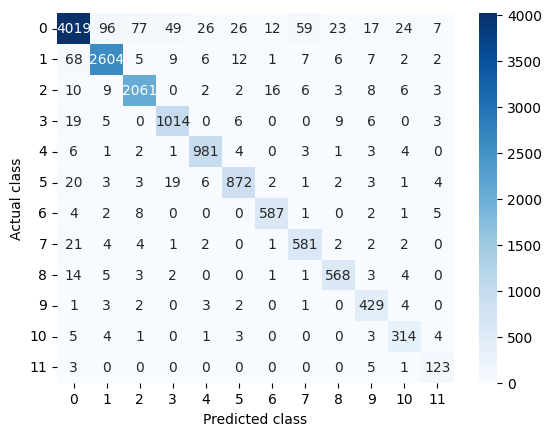

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
conf_matr = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matr, annot = True, fmt = '.0f', cmap = 'Blues')

plt.xlabel('Predicted class')
plt.ylabel('Actual class')
plt.yticks(rotation = 'horizontal')

plt.savefig('/content/drive/MyDrive/Data Scientest - Project/05. Sentiment Analysis/Users Reviews/User Reviews vs Genre/Visualisations/Confusion Matrix for Genre.png')
plt.show()

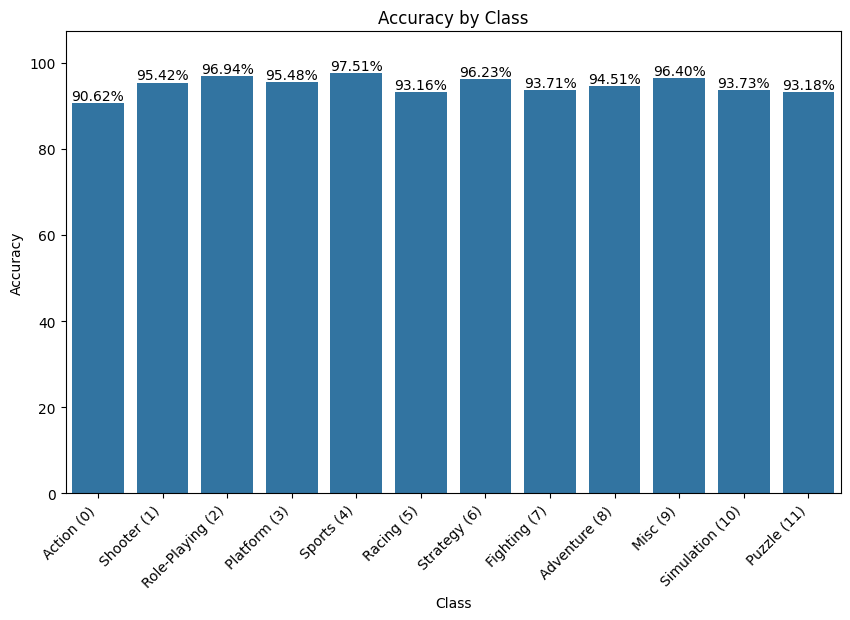

In [ ]:
# Accuracy Over Classes:
# To see how accuracy varies across classes:
import numpy as np
import seaborn as sns

class_accuracies = np.diag(confusion_matrix(y_test, y_pred)) / np.bincount(y_test) * 100

plt.figure(figsize = (10, 6))

ax = sns.barplot(x = np.arange(len(class_accuracies)), y = class_accuracies)
ax.bar_label(ax.containers[0], fmt = '{:0.2f}%')
ax.margins(y = 0.1)

# Genre to number mapping
genre_mapping = {
    'Action': 0,
    'Shooter': 1,
    'Role-Playing': 2,
    'Platform': 3,
    'Sports': 4,
    'Racing': 5,
    'Strategy': 6,
    'Fighting': 7,
    'Adventure': 8,
    'Misc': 9,
    'Simulation': 10,
    'Puzzle': 11
}

# Labels with genres and numbers
genre_labels = [f"{genre} ({num})" for genre, num in genre_mapping.items()]

# Set custom x-axis labels
ax.set_xticks(np.arange(len(genre_labels)))
ax.set_xticklabels(genre_labels, rotation = 45, ha = 'right')  # Rotate labels for better visibility

plt.title("Accuracy by Class")
plt.xlabel("Class")
plt.ylabel("Accuracy")

plt.savefig('/content/drive/MyDrive/Data Scientest - Project/05. Sentiment Analysis/Users Reviews/User Reviews vs Genre/Visualisations/Accuracy by Class for Genre.png')
plt.show()

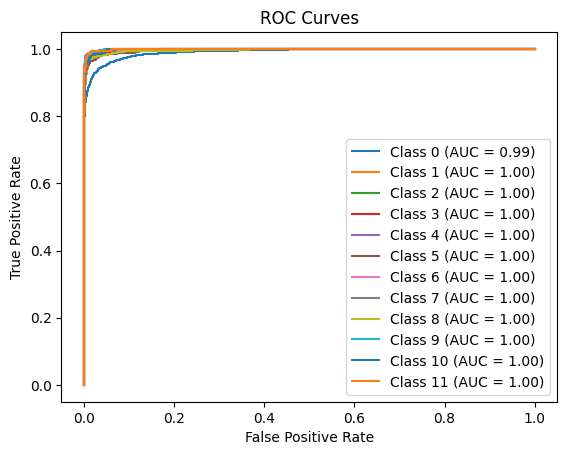

In [ ]:
# ROC Curves (For Multiclass):
# For a detailed view of model performance:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Plot ROC curves for each class
for i in range(len(np.unique(y_test))):
    fpr, tpr, _ = roc_curve(y_test == i, y_pred_proba[:, i])
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {auc(fpr, tpr):.2f})")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.title("ROC Curves")
plt.savefig('/content/drive/MyDrive/Data Scientest - Project/05. Sentiment Analysis/Users Reviews/User Reviews vs Genre/Visualisations/ROC Curves for Genre.png')
plt.show()


In [ ]:
from optuna.visualization import plot_param_importances

# Visualize parameter importance
plot_param_importances(study).show()


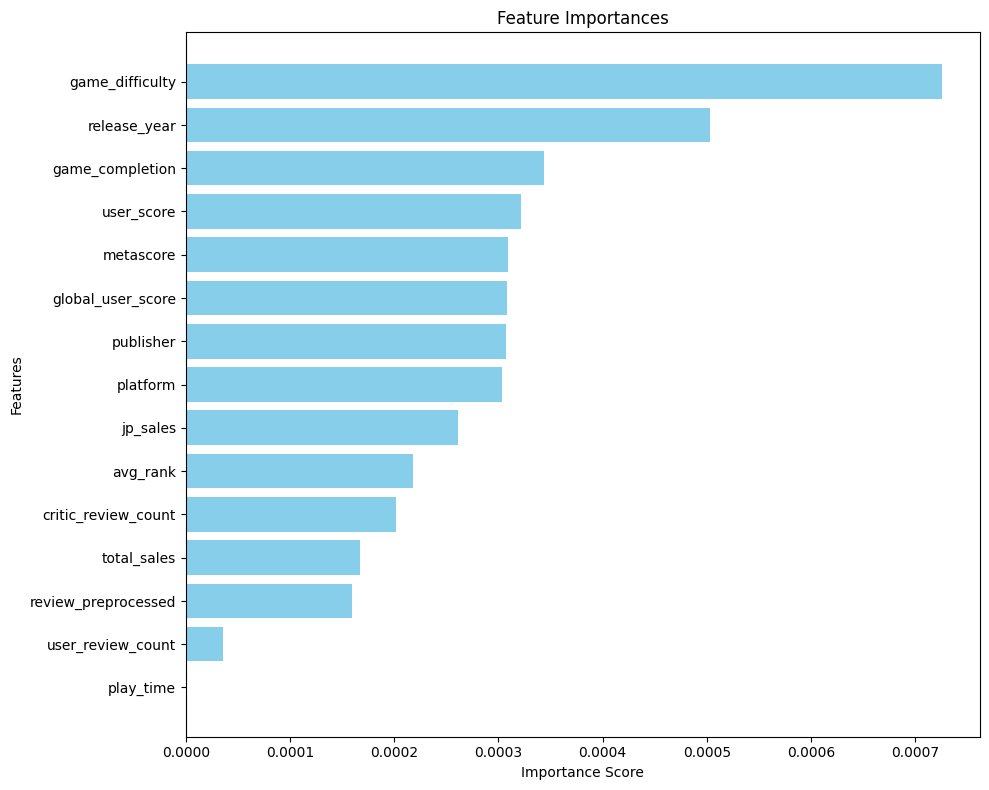

In [ ]:
import matplotlib.pyplot as plt

# Get feature importances
feature_importances = xgb_model_genre.feature_importances_

# Associate feature names with their importances
feature_names = X_train.columns  # Ensure your features have names
importance_dict = dict(zip(feature_names, feature_importances))

# Sort feature importances in descending order
sorted_importances = sorted(importance_dict.items(), key=lambda x: x[1], reverse=True)

# Split into names and values for plotting
features, importances = zip(*sorted_importances)

# Create the bar plot
plt.figure(figsize=(10, 8))
plt.barh(features, importances, color='skyblue')
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importances")
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Data Scientest - Project/05. Sentiment Analysis/Users Reviews/User Reviews vs Genre/Visualisations/Feature Importances for Genre.png')
plt.show()
